**Author:** Michael Eirikson\
**Date:** Fall 2023\
**Crouse:** Google Advanced Data Analytics\
**Description:** Capstone project. Analyse HR dataset and make recommendation on how to decrease employee turnover. Create model to predict who is likely to leave.


# **Capstone Project**
### Providing data-driven suggestions to improve employee retension at Salifort Motors

# Pace: Planing Stage
- Define project scope and goals
- Assess project and stakeholder needs
- Develope a workflow
- Initial EDA
- Questions
    - Who are the stakeholders for this project?
    - What is the problem to solve or goal to accomplish?
    - What are initial observations when the data is explored?
    - What resources were used to complete this stage? (Include Links)
    - Are there any ethical considerations in this stage?

### Business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They hire a data analytics professional and ask them to provide data-driven suggestions based on their understanding of the data. They have the following question: what’s likely to make the employee leave the company?

The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If employee quitting can be predicted, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Deliverables

- list of recommendations to Salifort Motors
- data visualization to support recommendations
- ML model to predict if an employee will leave
- ML model evaluation
- ethical considerations
- resources used to troubleshoot and find solutions

### HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

More information about the data is avalable on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
Satisfaction Level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
Average Monthly Hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, ComplementNB

from statsmodels.api import Logit 

from xgboost import XGBClassifier, plot_importance

import pickle

### Load dataset

In [2]:
df0 = pd.read_csv("Data/capstone_dataset.csv")
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

Goals:
- Understand variables
- Clean the dataset (missing data, redundant data, outliers)



### Basic info

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Descriptive stats

In [4]:
df0.describe(include="all")

satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique                   NaN                 NaN            NaN           NaN   
top                      NaN                 NaN            NaN           NaN   
freq                     NaN                 NaN            NaN           NaN   
mean              201.050337            3.498233       0.144610      0.238083   
std                49.943099            1.460136       0.351719      0.425924   
min                96.000000            2.000000       0.000000      0.000000   
25%               156.000000            3.000000       0.000000      0.000000   
50%               200.000000            3.000000       0.000000      0.000000   
75%               245.000000            4.000000       0.000000      0.000000   
max               310.000000           10.000000       1.000000      1.000000   

        promotion_last_5years Department salary  
count            14999.000000      14999  14999  
unique                    NaN         10      3  
top                       NaN      sales    low  
freq                      NaN       4140   7316  
mean                 0.021268        NaN    NaN  
std                  0.144281        NaN    NaN  
min                  0.000000        NaN    NaN  
25%                  0.000000        NaN    NaN  
50%                  0.000000        NaN    NaN  
75%                  0.000000        NaN    NaN  
max                  1.000000        NaN    NaN

### Rename columns

Standardize feature names

In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
for col in df0.columns:
    df0.rename(columns={col:col.replace("_"," ").title()}, inplace=True)

df0.columns

Index(['Satisfaction Level', 'Last Evaluation', 'Number Project',
       'Average Montly Hours', 'Time Spend Company', 'Work Accident', 'Left',
       'Promotion Last 5Years', 'Department', 'Salary'],
      dtype='object')

In [7]:
df0.rename(columns={
    "Number Project":"Number of Projects",
    "Average Montly Hours":"Average Monthly Hours",
    "Time Spend Company":"Tenure",
    "Promotion Last 5Years":"Promotion in Last 5 Years"
}, inplace=True)
df0.columns

Index(['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Average Monthly Hours', 'Tenure', 'Work Accident', 'Left',
       'Promotion in Last 5 Years', 'Department', 'Salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
df0.isna().sum()

Satisfaction Level           0
Last Evaluation              0
Number of Projects           0
Average Monthly Hours        0
Tenure                       0
Work Accident                0
Left                         0
Promotion in Last 5 Years    0
Department                   0
Salary                       0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
df0.duplicated().sum()

3008

View duplicated data

In [10]:
df0[df0.duplicated()]

Satisfaction Level  Last Evaluation  Number of Projects  \
396                  0.46             0.57                   2   
866                  0.41             0.46                   2   
1317                 0.37             0.51                   2   
1368                 0.41             0.52                   2   
1461                 0.42             0.53                   2   
...                   ...              ...                 ...   
14994                0.40             0.57                   2   
14995                0.37             0.48                   2   
14996                0.37             0.53                   2   
14997                0.11             0.96                   6   
14998                0.37             0.52                   2   

       Average Monthly Hours  Tenure  Work Accident  Left  \
396                      139       3              0     1   
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461                     142       3              0     1   
...                      ...     ...            ...   ...   
14994                    151       3              0     1   
14995                    160       3              0     1   
14996                    143       3              0     1   
14997                    280       4              0     1   
14998                    158       3              0     1   

       Promotion in Last 5 Years  Department  Salary  
396                            0       sales     low  
866                            0  accounting     low  
1317                           0       sales  medium  
1368                           0       RandD     low  
1461                           0       sales     low  
...                          ...         ...     ...  
14994                          0     support     low  
14995                          0     support     low  
14996                          0     support     low  
14997                          0     support     low  
14998                          0     support     low  

[3008 rows x 10 columns]

Drop duplicates

In [11]:
df1 = df0.drop_duplicates()
df1.head()

Satisfaction Level  Last Evaluation  Number of Projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   Average Monthly Hours  Tenure  Work Accident  Left  \
0                    157       3              0     1   
1                    262       6              0     1   
2                    272       4              0     1   
3                    223       5              0     1   
4                    159       3              0     1   

   Promotion in Last 5 Years Department  Salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low

In [12]:
df1.shape

(11991, 10)

### Check outliers

Check each feature for outliers.

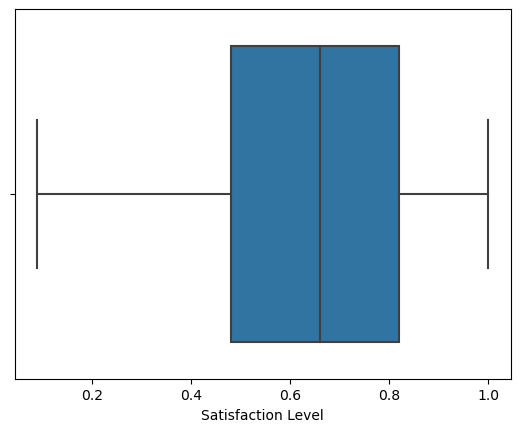

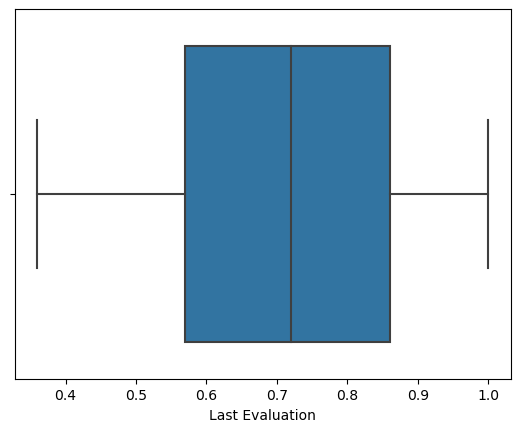

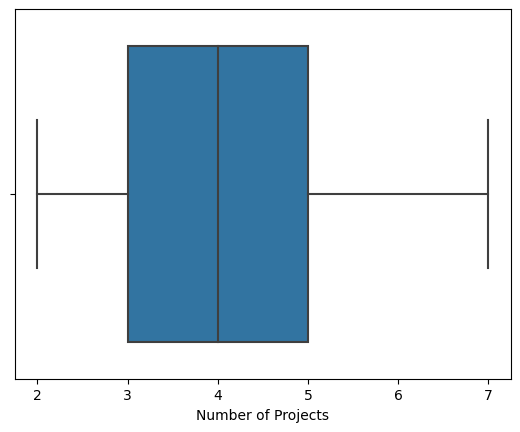

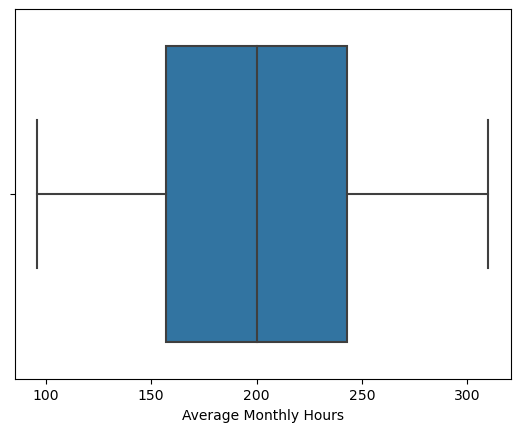

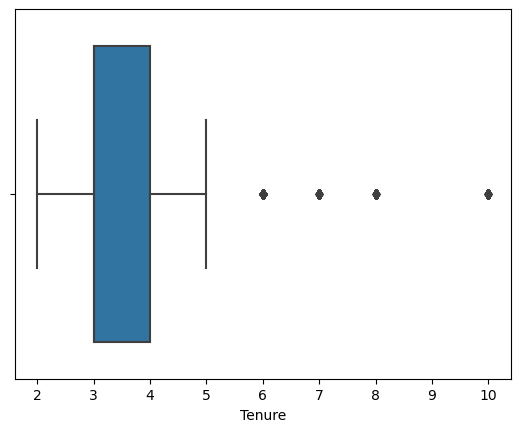

In [13]:
for col in df1.columns[:5]:
    sns.boxplot(data=df1, x=col)
    plt.show()

Tenure is the only feature with outliers. Depending on modeling these outliers may need to be removed.

In [14]:
# How many rows have tenure outliers
df1[df1["Tenure"]>5].shape


(824, 10)

### Get value counts

- See if value counts seem normal
- Check for other data issues such as multiple spelling for the same value in features of type object

In [15]:
for col in df1.columns:
    print(col)
    print(df1[col].value_counts())
    print()

Satisfaction Level
0.74    214
0.10    203
0.73    201
0.50    200
0.72    199
       ... 
0.25     29
0.26     28
0.12     26
0.28     24
0.27     23
Name: Satisfaction Level, Length: 92, dtype: int64

Last Evaluation
0.55    281
0.50    269
0.51    264
0.57    258
0.54    252
       ... 
0.42     45
0.43     44
0.38     42
0.44     35
0.36     19
Name: Last Evaluation, Length: 65, dtype: int64

Number of Projects
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: Number of Projects, dtype: int64

Average Monthly Hours
156    112
149    112
160    111
151    107
135    104
      ... 
298      5
302      5
297      5
299      5
303      5
Name: Average Monthly Hours, Length: 215, dtype: int64

Tenure
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: Tenure, dtype: int64

Work Accident
0    10141
1     1850
Name: Work Accident, dtype: int64

Left
0    10000
1     1991
Name: Left, dtype: int64

Promotion in Last 5 Years
0    1178

For tenure:
- why are there no employees with 9 years?
- why the sudden bump in employees with 10 years?
- is 10 actually 9 and 10?

### How many employees left and what percentage of all employees this figure represents.

In [16]:
print("Number of employees who have left vs not left:")
print(df1["Left"].value_counts())
print()
print("Percent of employees who have left vs not leftL:")
print(df1["Left"].value_counts()/df1.shape[0])

Number of employees who have left vs not left:
0    10000
1     1991
Name: Left, dtype: int64

Percent of employees who have left vs not leftL:
0    0.833959
1    0.166041
Name: Left, dtype: float64


# pAce: Analyze Stage
- Perform Exploratory Data Analysis
- Questions
    - What was observe about the relationships between variables?
    - What is noteworthy about how the data is distributed?
    - What transformations were made with the data? Why did were those tranformaitons done?
    - How will this EDA support constructing a predictive model?
    - What resources were used to complete this stage? (Include links)
    - Are there any ethical considerations in this stage?

## Step 2. Data Exploration (Continue EDA)

### Data Visualizations - General

In [17]:
def initial_figures(feature, multiple="layer", shrink=1, show=True, bxplt = True):
    if bxplt:
        fig, ax = plt.subplots(1, 4, figsize = (24,5))
        sns.boxplot(data=df1, y=feature, ax=ax[3], x="Left")
        ax[3].set(title=f"{feature} Boxplot\nLeft vs Not Left")
        ax[3].set(xticklabels=["Not Left","Left"])
        ax[3].set(xlabel="Left")
    else:
        fig, ax = plt.subplots(1, 3, figsize = (18,5))

    sns.histplot(data=df1, x=feature, ax=ax[0], shrink=shrink) 
    sns.histplot(data=df1, x=feature, ax=ax[1], shrink=shrink, multiple=multiple, hue="Left")
    sns.histplot(data=df1, x=feature, ax=ax[2], shrink=shrink, multiple="fill", hue="Left")
    
    ax[0].set(title=f"{feature} Histogram\n")
    ax[1].set(title=f"{feature} Histogram\nLeft vs Not Left")
    ax[2].set(title=f"{feature} Histogram\nLeft vs Not Left \n Bins add to 100%")
    
    for i in [1,2]:
        ax[i].legend(["Left","Not Left"])
    
    if show:
        plt.show()

    return ax


def initial_figures_short(feature, multiple="layer", shrink=1, show=True):
    fig, ax = plt.subplots(1, 2, figsize = (11,5))

    sns.histplot(data=df1, x=feature, ax=ax[0], shrink=shrink, multiple=multiple, hue="Left")
    sns.histplot(data=df1, x=feature, ax=ax[1], shrink=shrink, multiple="fill", hue="Left")
    
    ax[0].set(title=f"{feature} Histogram\nLeft vs Not Left")
    ax[1].set(title=f"{feature} Histogram\nLeft vs Not Left \n Bins add to 100%")
    
    for i in [0,1]:
        ax[i].legend(["Left","Not Left"])
    
    if show:
        plt.show()
        
    return ax

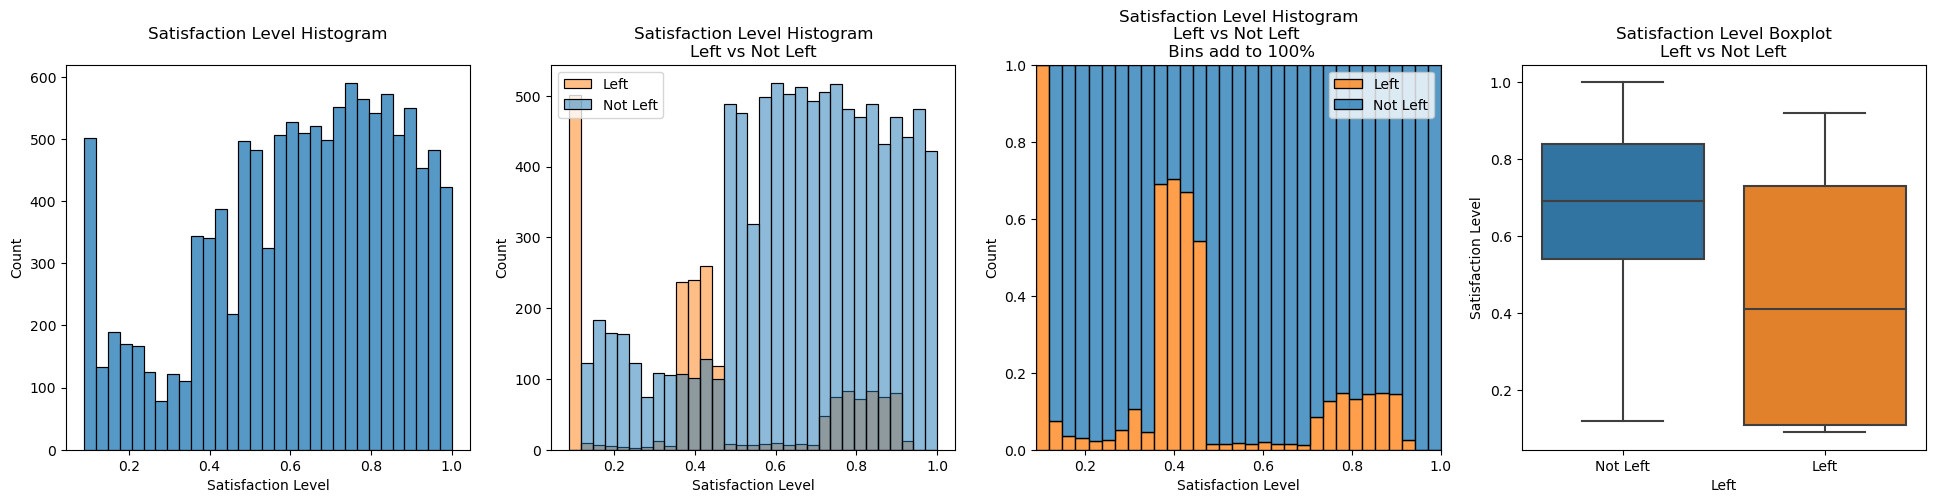

In [18]:
ax = initial_figures("Satisfaction Level")

- why are there three very distinct groups who have left?
- what is the deal with the large spike at the low end of safisfaction level?
- why is a group with high satisfaction leaving?

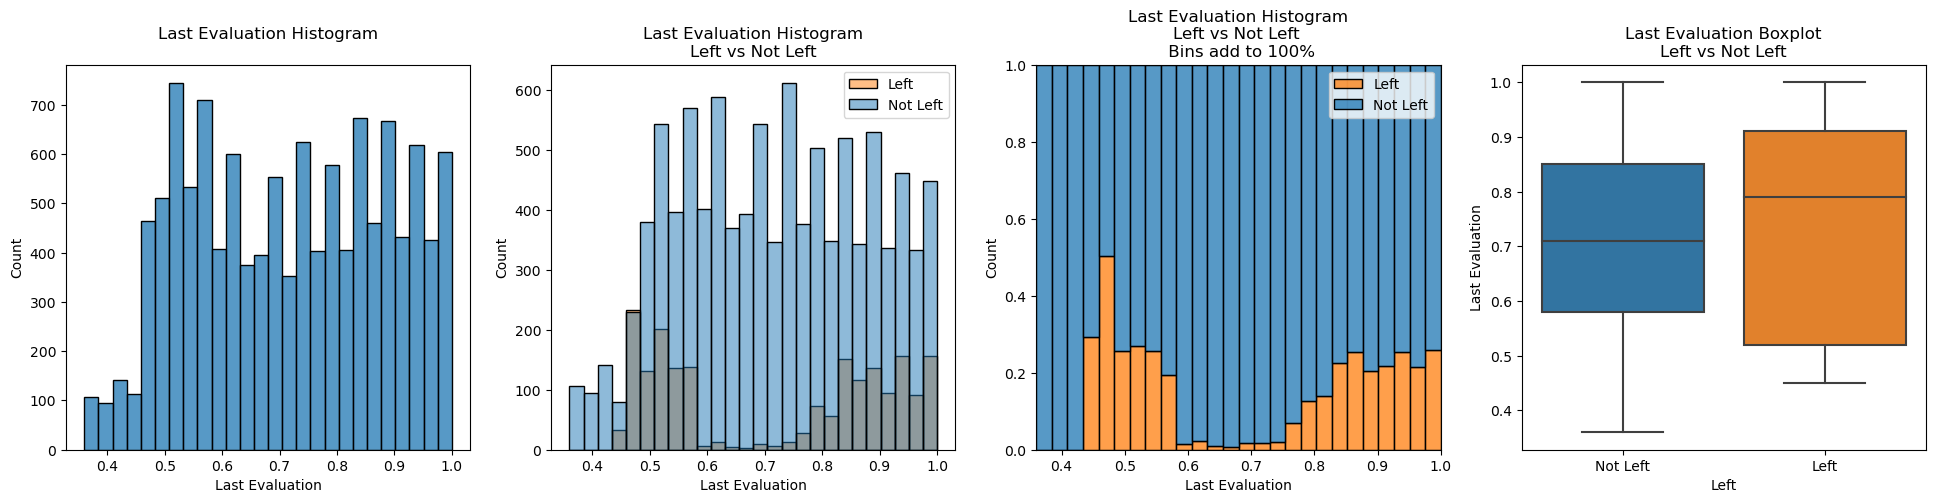

In [19]:
ax = initial_figures("Last Evaluation")

- why are there two very distinct groups who have left?
- the group with high evaluation scores really need to be retained, why are they leaving?
- is the group with lower evaluation scores quitting or being fired? can this data be added to the dataset

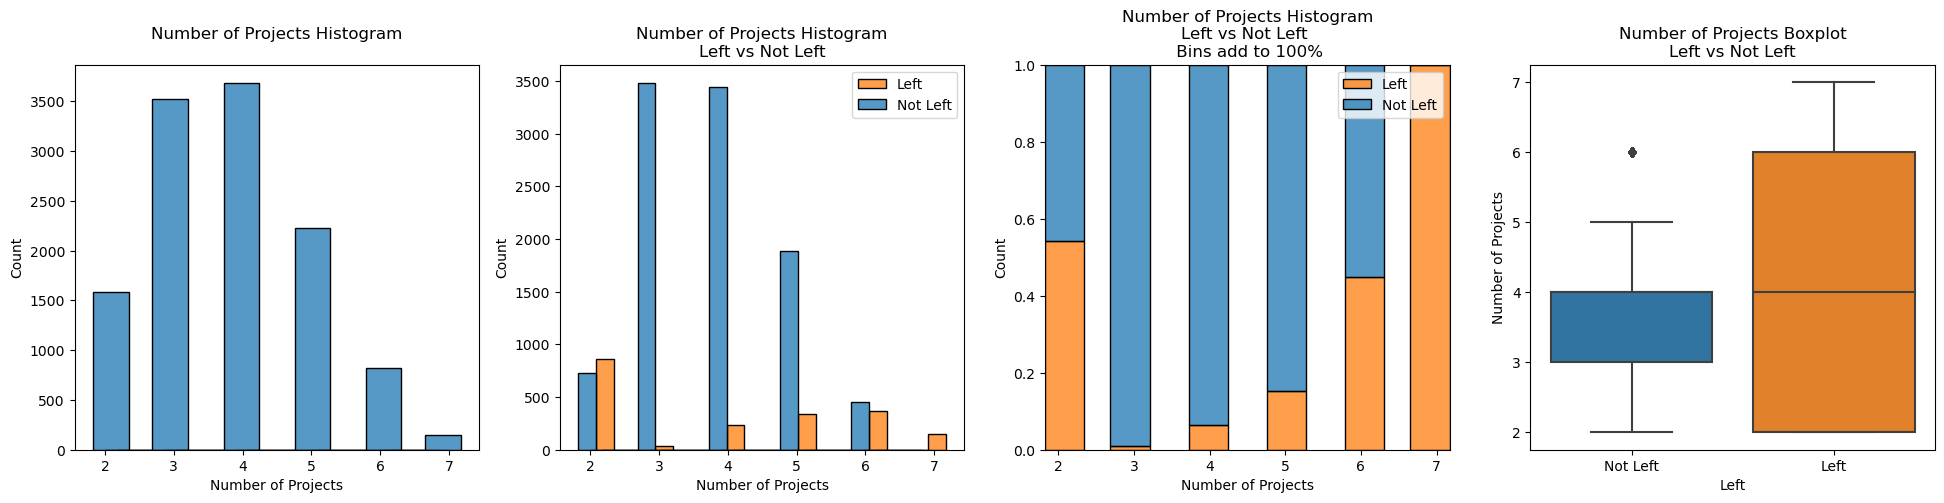

In [20]:
ax = initial_figures("Number of Projects", multiple="dodge", shrink=3)

- By far the best project number for employee retenion is 3 or 4.
- These results are very logical. The third figure will be an important figure to include in the report.

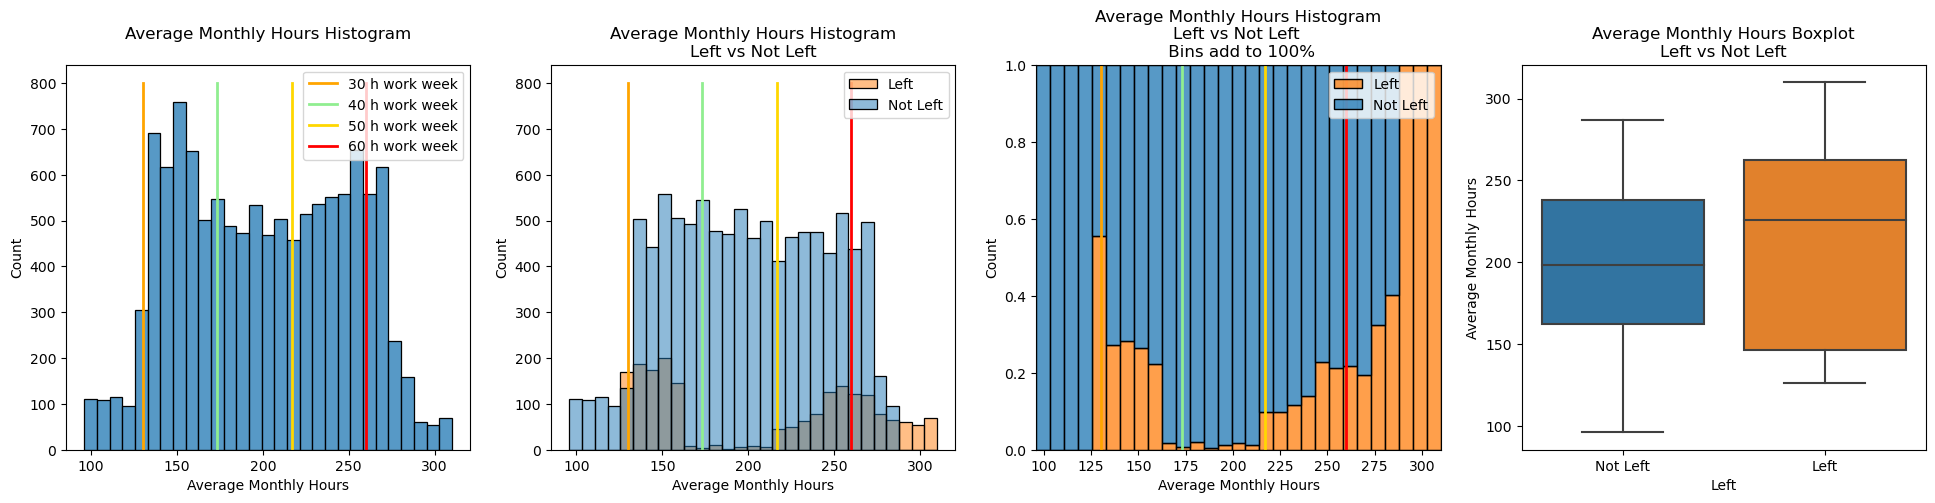

In [21]:
ax = initial_figures("Average Monthly Hours", show=False)
x_list = [130.000003, 173.333333, 216.666663, 259.999993]

for i in [0,1,2]:
    ymax=800
    if i==2:
        ymax=1
    ax[i].plot([130,130], [0,ymax],'orange',linewidth=2, label = "30 h work week") 
    ax[i].plot([173,173], [0,ymax],'lightgreen',linewidth=2, label = "40 h work week") 
    ax[i].plot([217,217], [0,ymax],'gold',linewidth=2, label = "50 h work week") 
    ax[i].plot([260,260], [0,ymax],'r',linewidth=2, label = "60 h work week") 
    if i==0: 
        ax[i].legend()  
plt.show()

- again there are two major groups of employees who are leaving
- do these correlate with satisfaction_level groups and/or last_evaluation groups
- Average Monthly Hours when working 40 hours per week should be 52 x 40 / 12 = 173.3 h/month

| Average Monthly Hours | Average Weekly Hours |
|-----------------------|----------------------|
| 130.0                 | 30                   |
| 173.3                 | 40                   |
| 216.6                 | 50                   |
| 260.0                 | 60                   |

- this workforce is very overworked
- employees who work more than ~220h/month ~= 51h/week are much more likely to quit
- there may be a work culture issue in this company
- how would this look if there was informaiton about who quit and fired overlayed on there graphs?
    - maybe worked too much is more likely to quit and worked too little is more liekly to be fired, or maybe people who were working less didn't like the pressure of the work culture and so quit?
- satisfaction_level, last_evaluation, and average_monthely_hours all have two bumps. Are these correlated? What could explain this?

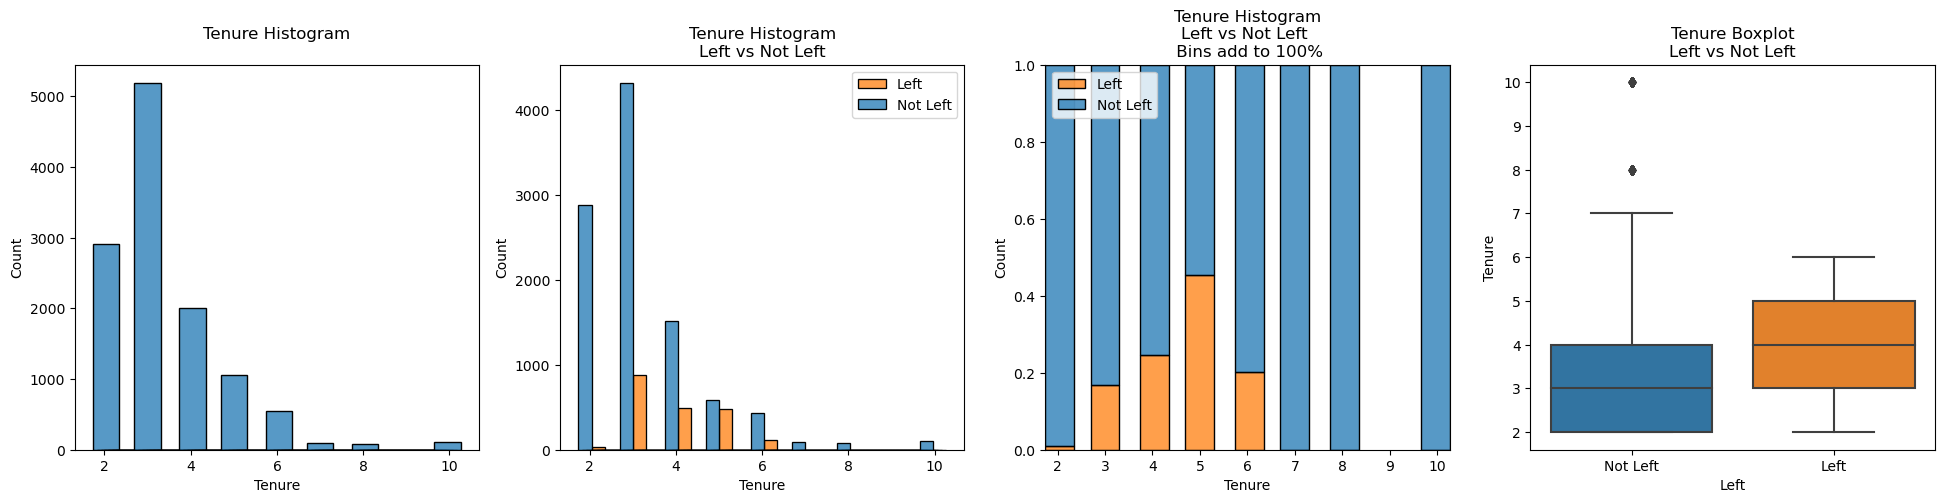

In [22]:
ax = initial_figures("Tenure", multiple="dodge", shrink=7)

- loosing employees mostly between 3 - 6 years
- are there specific policies that could help. ie raises or promotions?
- I wonder how this would look if we had could break it down by quit or fired.
- Could use high preforming vs low performing as a proxy for quit or fired maybe.

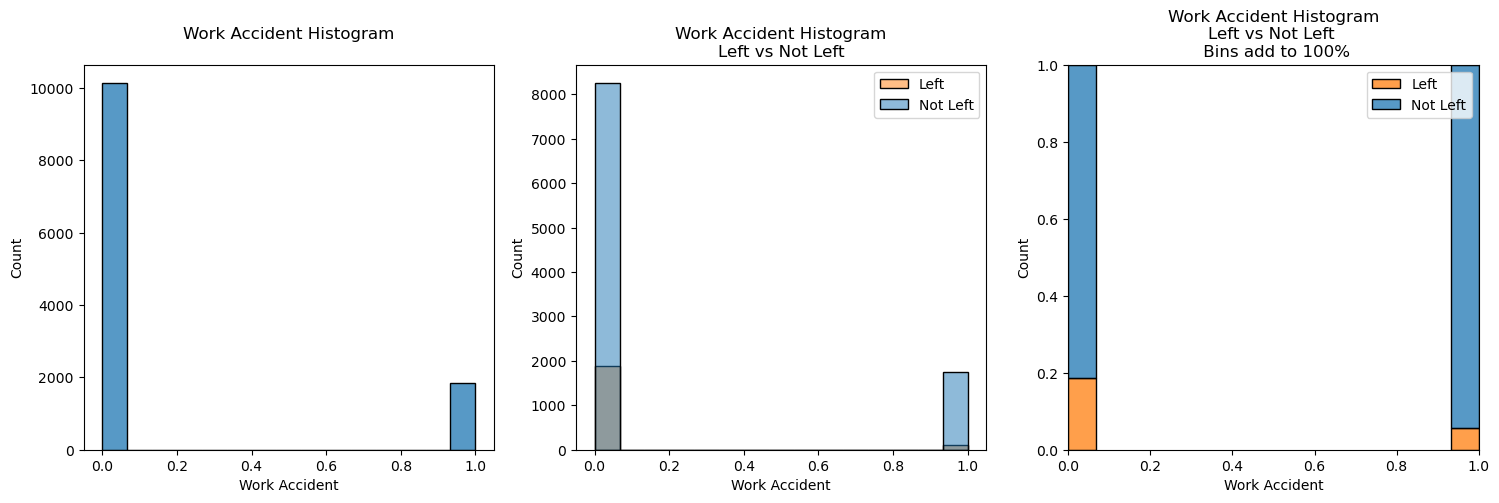

In [23]:
ax = initial_figures("Work Accident", bxplt=False)

- why are people more likely to stay if they have had an accident?
- my assumption would be that they would be more likely to leave
    - maybe it has something to do with worksafeBC (or similar) policies

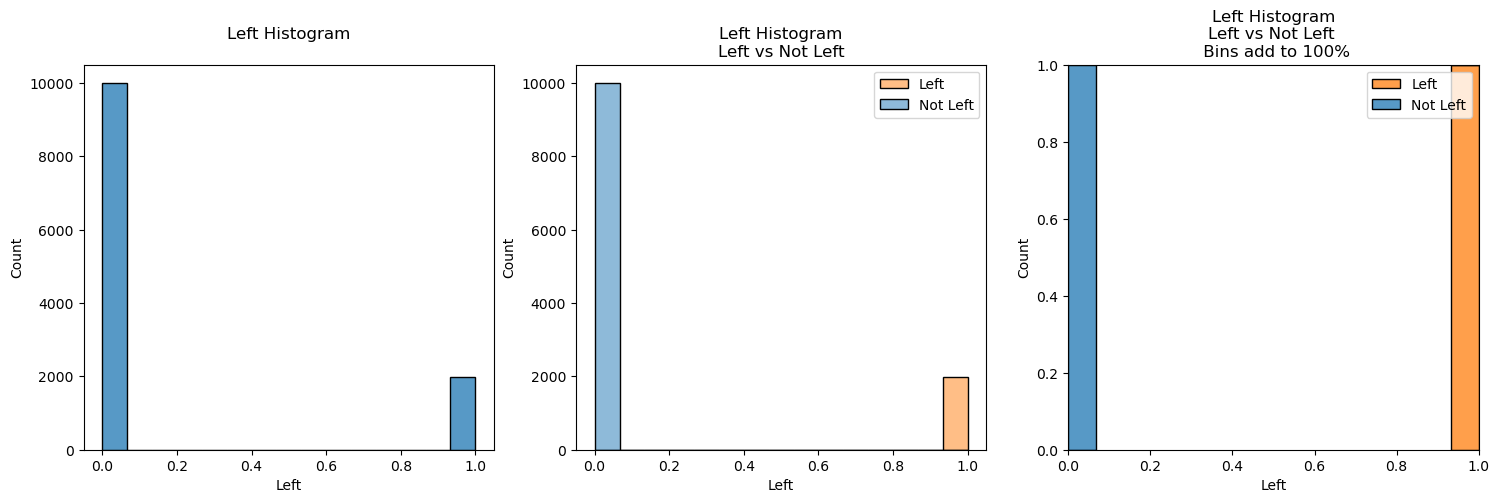

In [24]:
ax = initial_figures("Left", bxplt=False)

- not very interesting

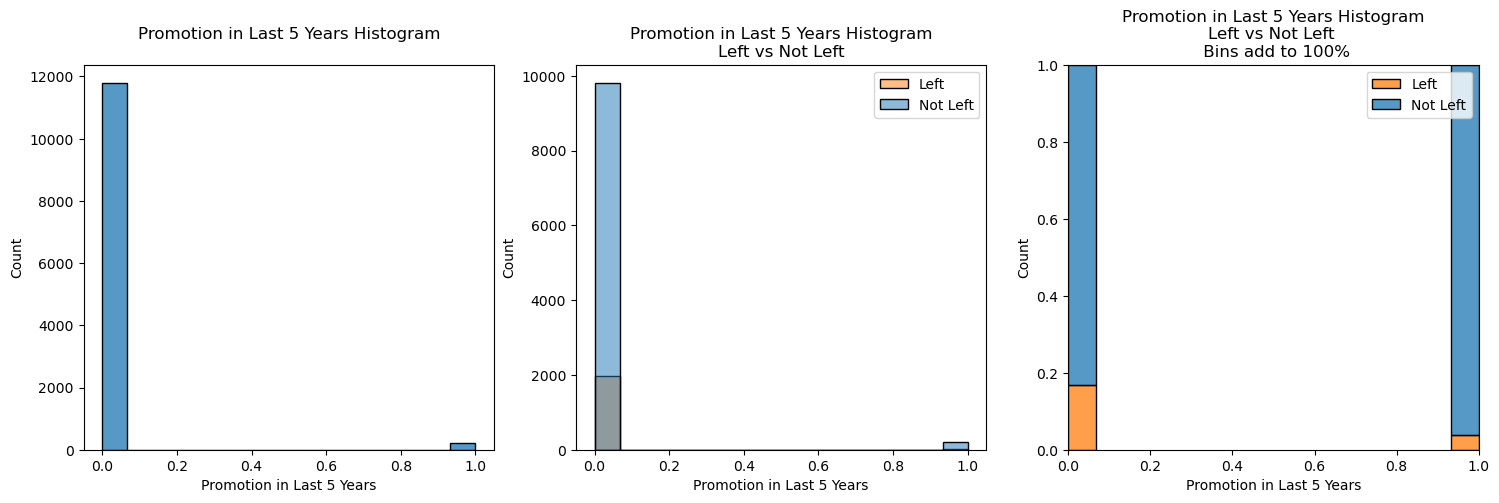

In [25]:
ax = initial_figures("Promotion in Last 5 Years", bxplt=False)

- this might mean 10-15% of employees who have left might have stayed if they had been promoted

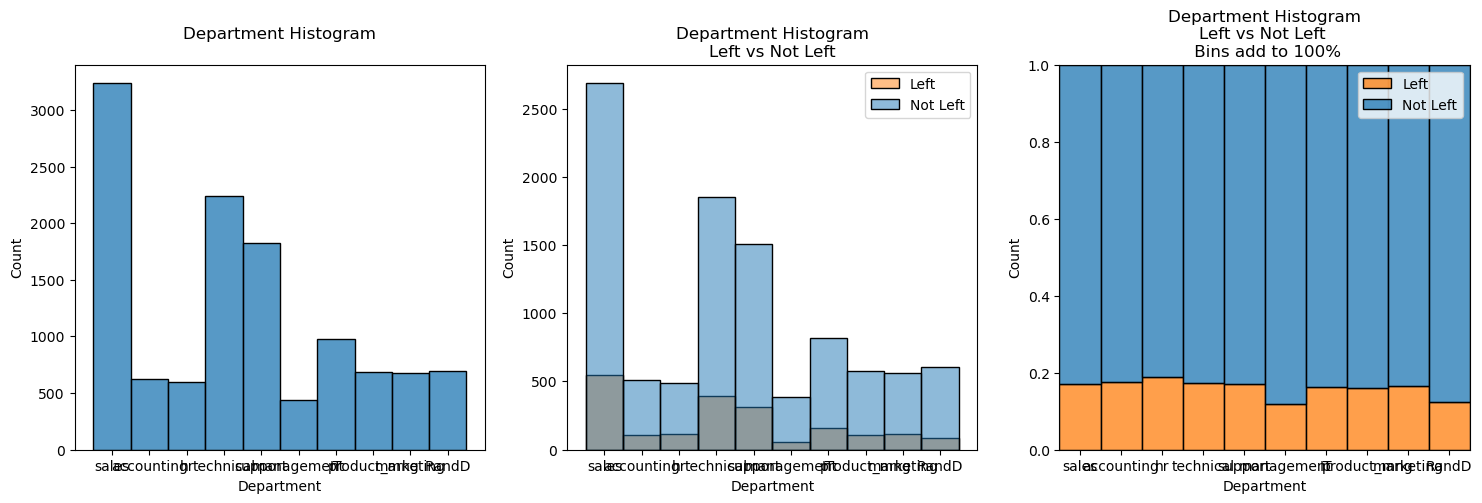

In [26]:
ax = initial_figures("Department", bxplt=False)

- department is not a significant factor in an employee leaving

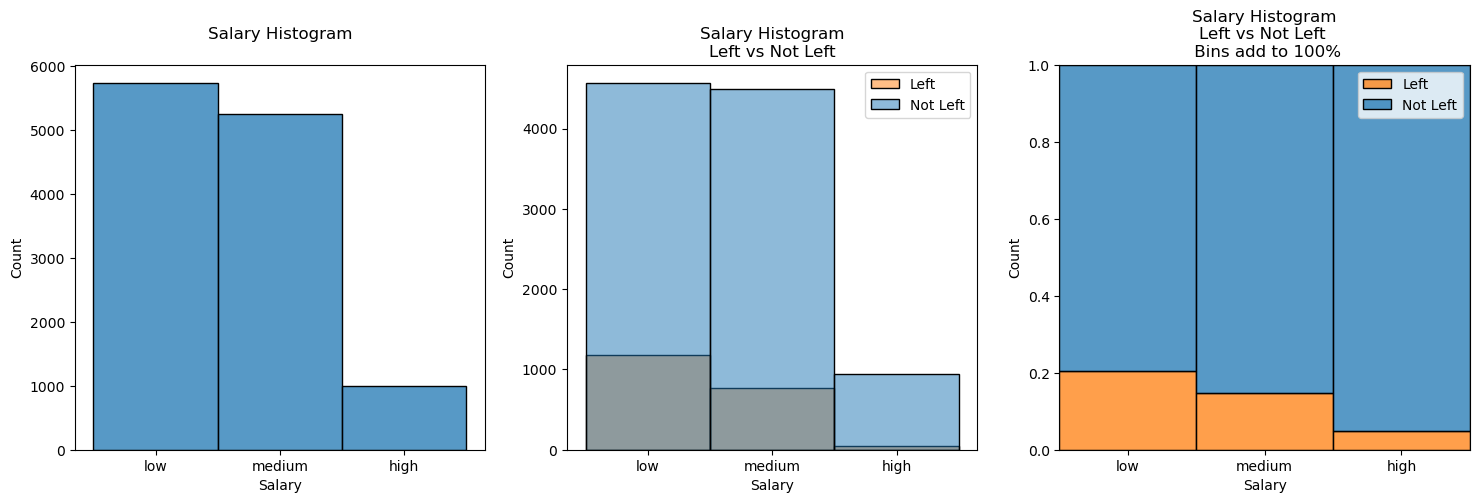

In [27]:
ax = initial_figures("Salary", bxplt=False)

- High pay is significant
- Looking at thing relatively the step from low to medium pay gets a pretty similar improvement in retension as the step from medium to high
- What are the pay ranges of low, medium and high salary? What are the actual employee salaries?
    - salary ranges or specific salaries and the cost of onboarding new employees can be analyzed to determine the way to minimize the total cost

#### Pairplot 
Scatterplot of all combinations of features

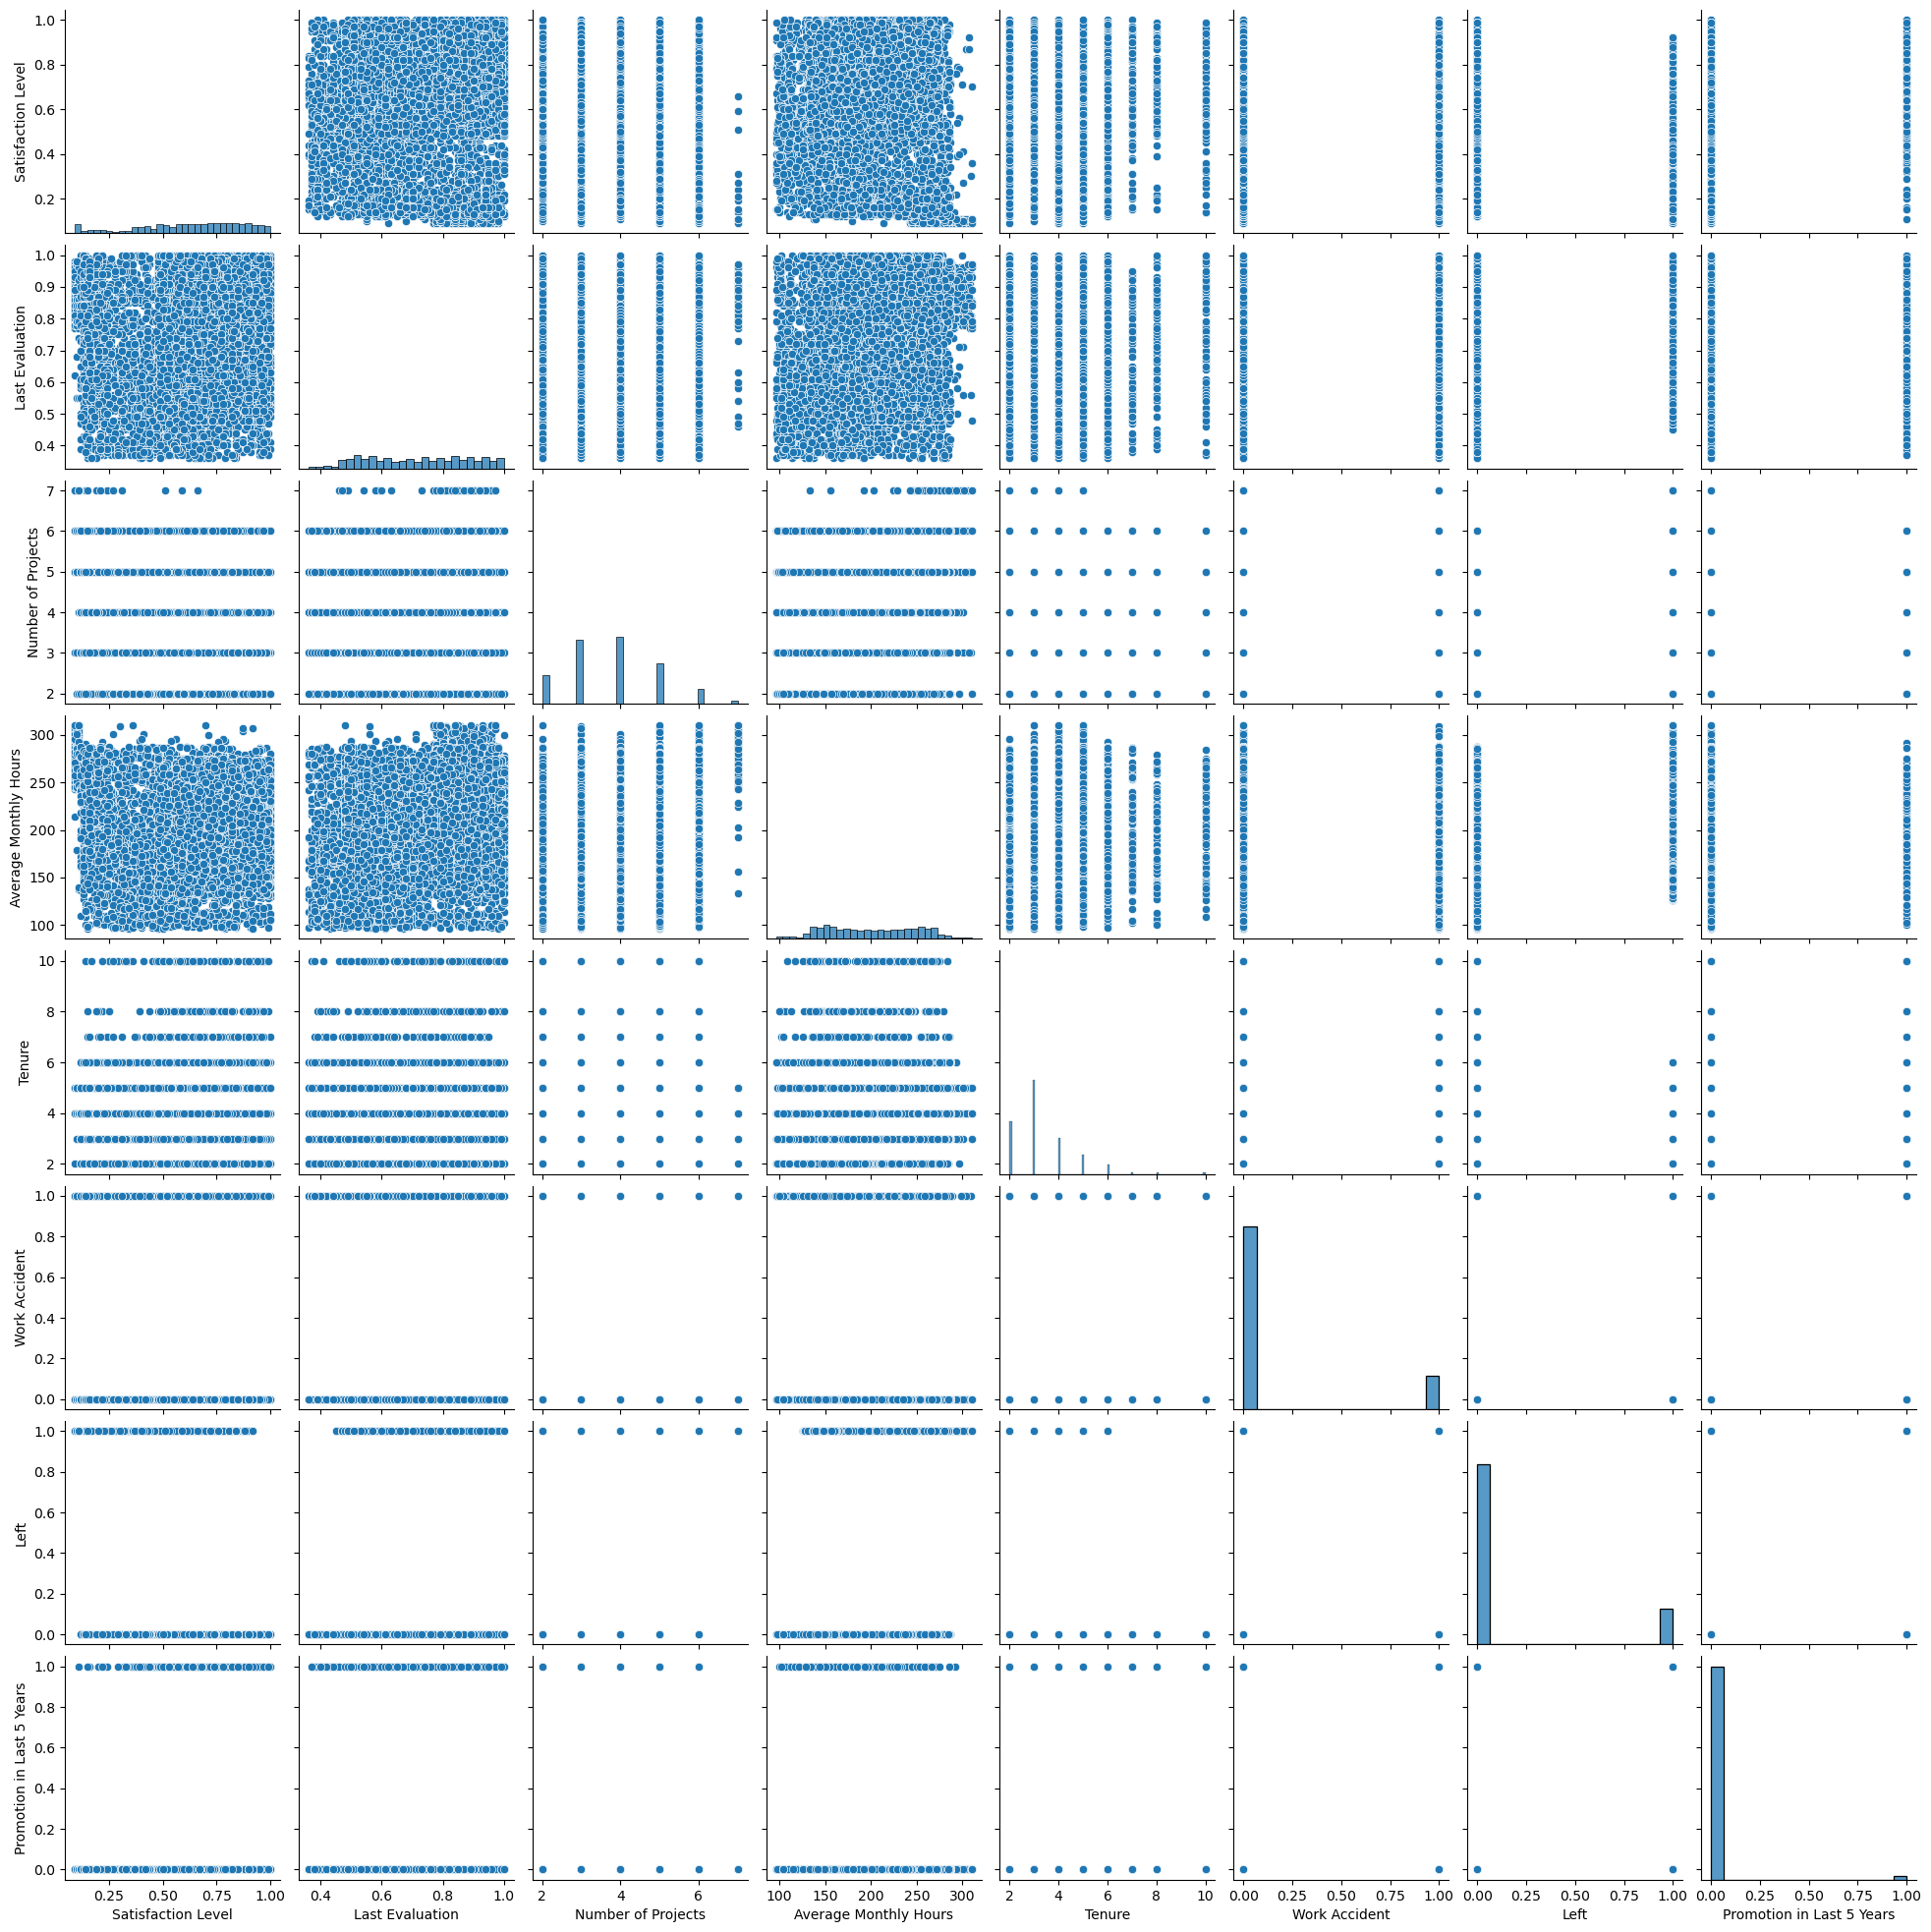

In [28]:
sns.pairplot(df1)
plt.show()

- nothing particularily interesting in pairplots

#### Correlation heatmap

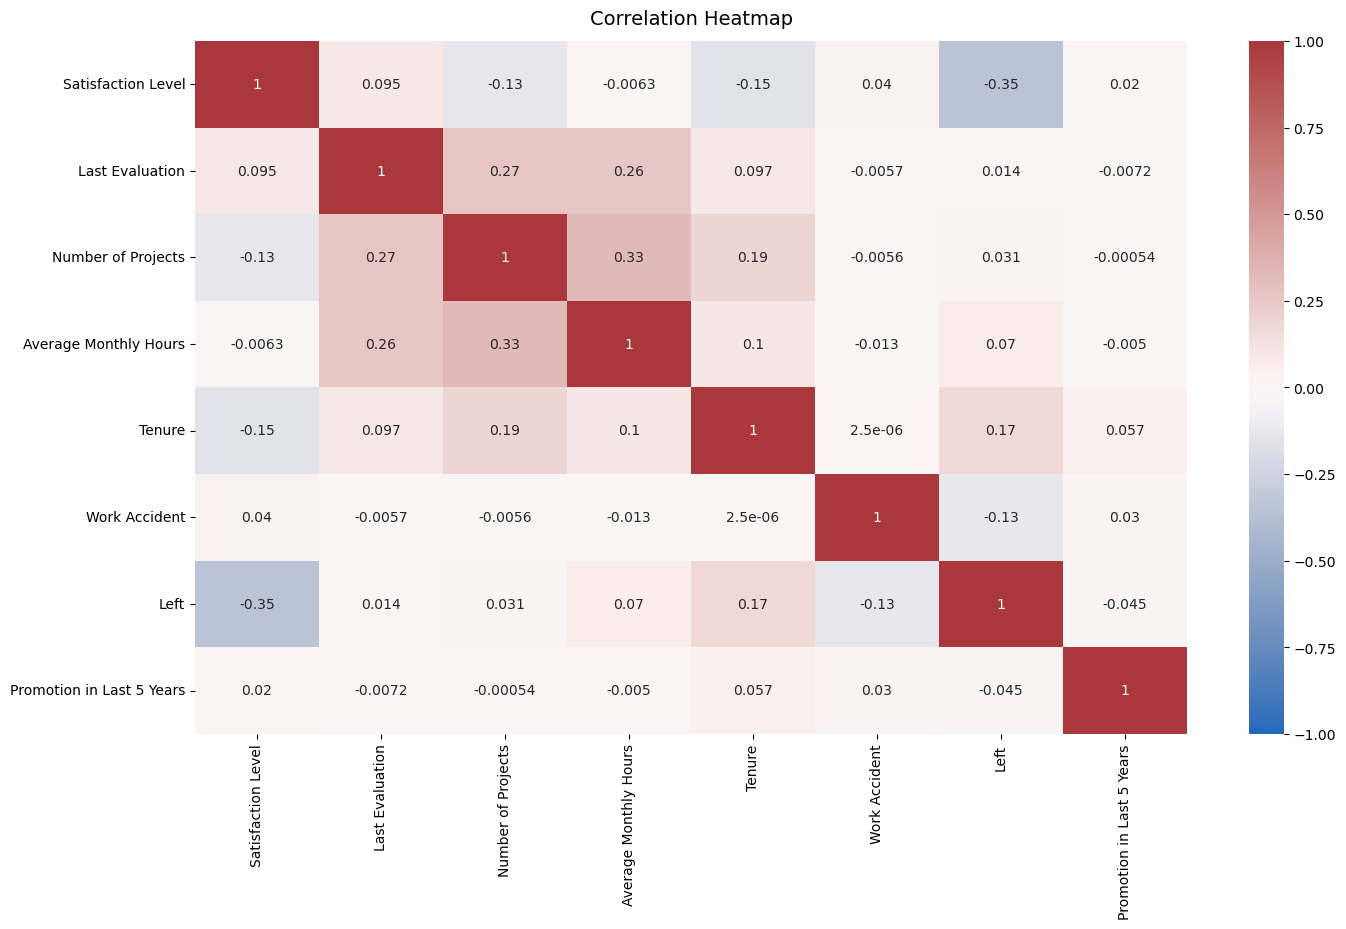

In [29]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

- number_project, Average Monthly Hours, and last_evaluation are all correlated
- left most strongly correlates to satisfaction_level

### Data Visualizations - Specific

In [30]:
group_num_project = df1.groupby("Number of Projects").median(numeric_only=True)
group_tenure = df1.groupby("Tenure").median(numeric_only=True)

#### Number of Projects

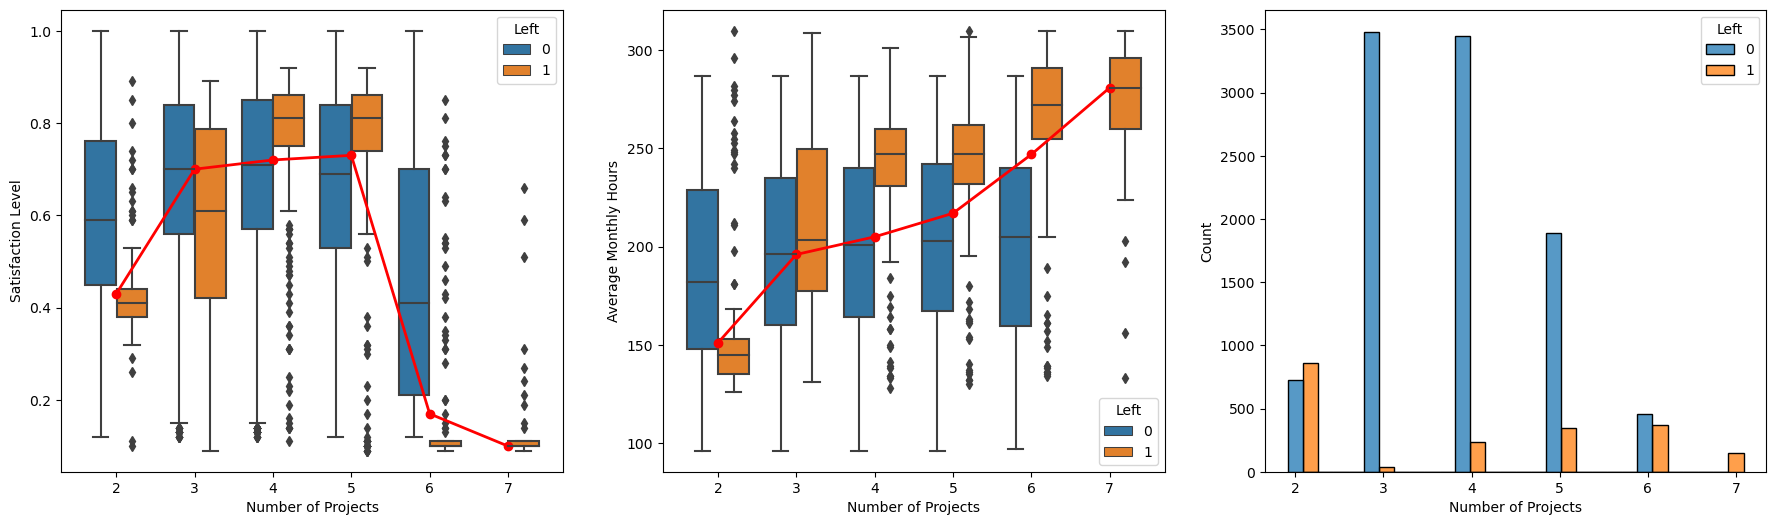

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(22,6))

sns.boxplot(data=df1, y="Satisfaction Level", x="Number of Projects", hue="Left", ax=ax[0])
ax[0].plot(group_num_project["Satisfaction Level"].values,'r-o',linewidth=2)

sns.boxplot(data=df1, y="Average Monthly Hours", x="Number of Projects", hue="Left", ax=ax[1])
ax[1].plot(group_num_project["Average Monthly Hours"].values,'r-o',linewidth=2)

sns.histplot(data=df1, x="Number of Projects", hue="Left", multiple="dodge", shrink=2, ax=ax[2])

plt.show()

- for employees who left satisfaction level tends to increase with project number till they reach 6 project
- employees who left tend to work more hours when working more projects, employees who have not left tend to work about the same regardless of project number
- employees who work 3 or 4 project tend to be unlikely to leave

#### Monthly Hours, Satisfaction Level, and Last Evaluation

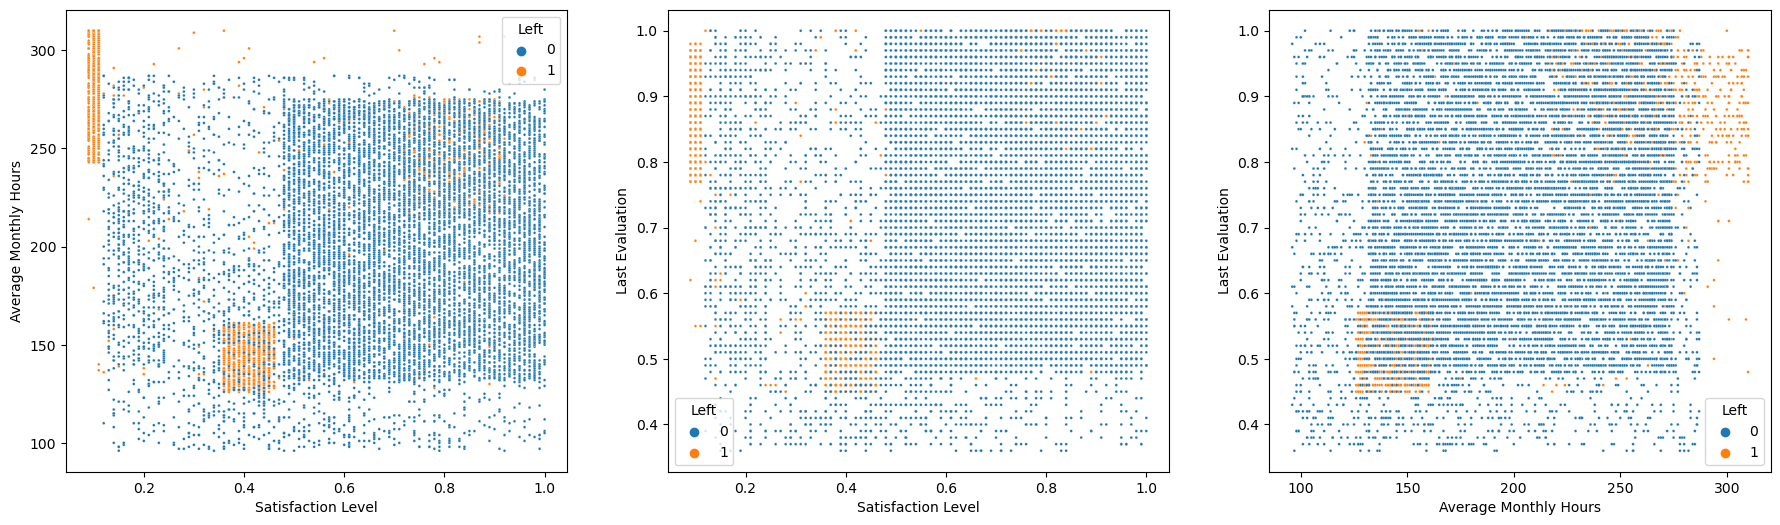

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(22,6))
sns.scatterplot(data=df1, x="Satisfaction Level", y="Average Monthly Hours", hue="Left", s=4, ax=ax[0])
sns.scatterplot(data=df1, x="Satisfaction Level", y="Last Evaluation", hue="Left", s=4, ax=ax[1])
sns.scatterplot(data=df1, x="Average Monthly Hours", y="Last Evaluation", hue="Left", s=4, ax=ax[2])
plt.show()



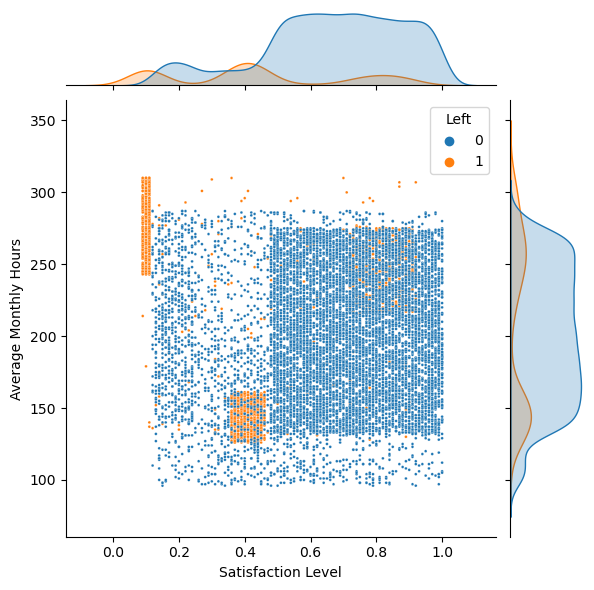

In [33]:
g = sns.jointplot(data=df1, x="Satisfaction Level", y="Average Monthly Hours", hue="Left", s=4)

plt.show()

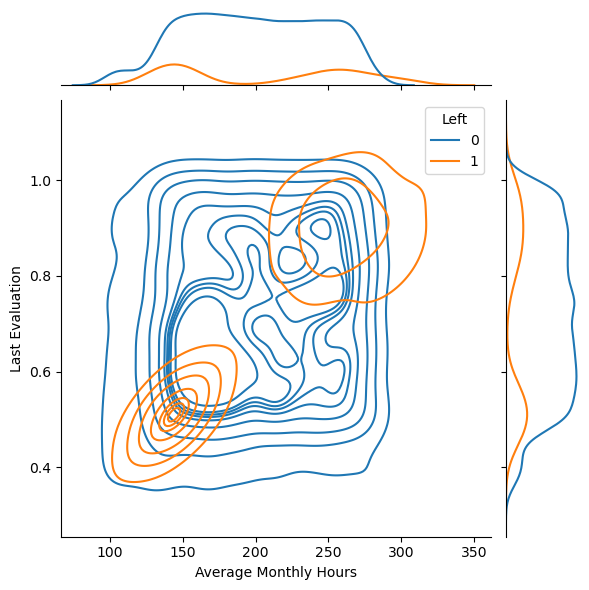

In [34]:
g = sns.jointplot(data=df1, x="Average Monthly Hours", y="Last Evaluation", hue="Left", kind="kde")

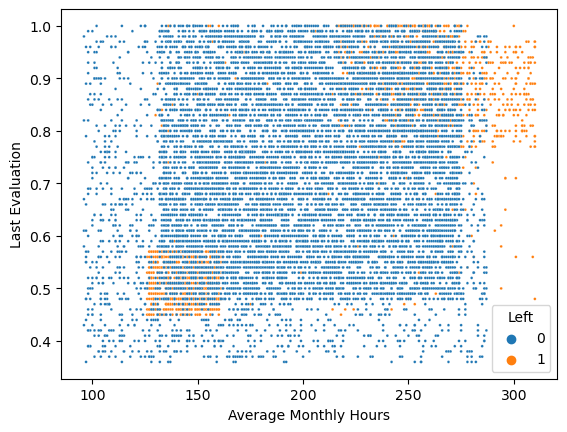

In [35]:
sns.scatterplot(data=df1, x="Average Monthly Hours", y="Last Evaluation", hue="Left", s=4)
plt.show()

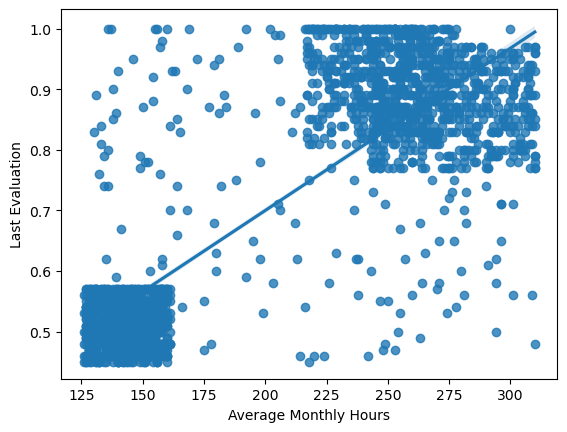

In [36]:
sns.regplot(data=df1[df1["Left"]==1], x="Average Monthly Hours", y="Last Evaluation")
plt.show()

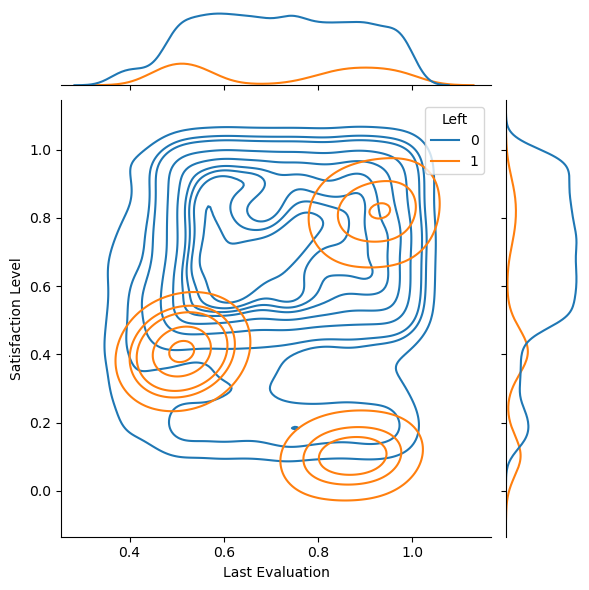

In [37]:
sns.jointplot(data=df1, x="Last Evaluation", y="Satisfaction Level", hue="Left", kind="kde")
plt.show()

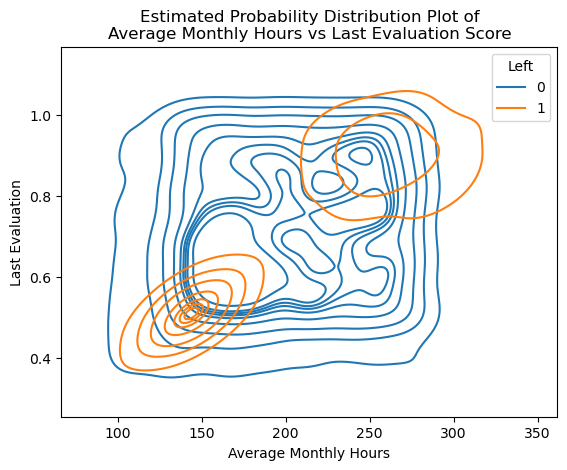

In [38]:
ax = sns.kdeplot(data=df1, x="Average Monthly Hours", y="Last Evaluation", hue="Left")
plt.title("Estimated Probability Distribution Plot of\nAverage Monthly Hours vs Last Evaluation Score")
plt.show()

- These scatterplot show that either 1) this data has been manually changed or 2) this data is synthetic.
- Because of how this data was created, these features will likely be very useful at making predictions.
- Employees who left tend to get better evaluations if they work more hours, this is not the case for other employees
    - pressure to work long hours may be a factor in an employee leaving

#### Tenure

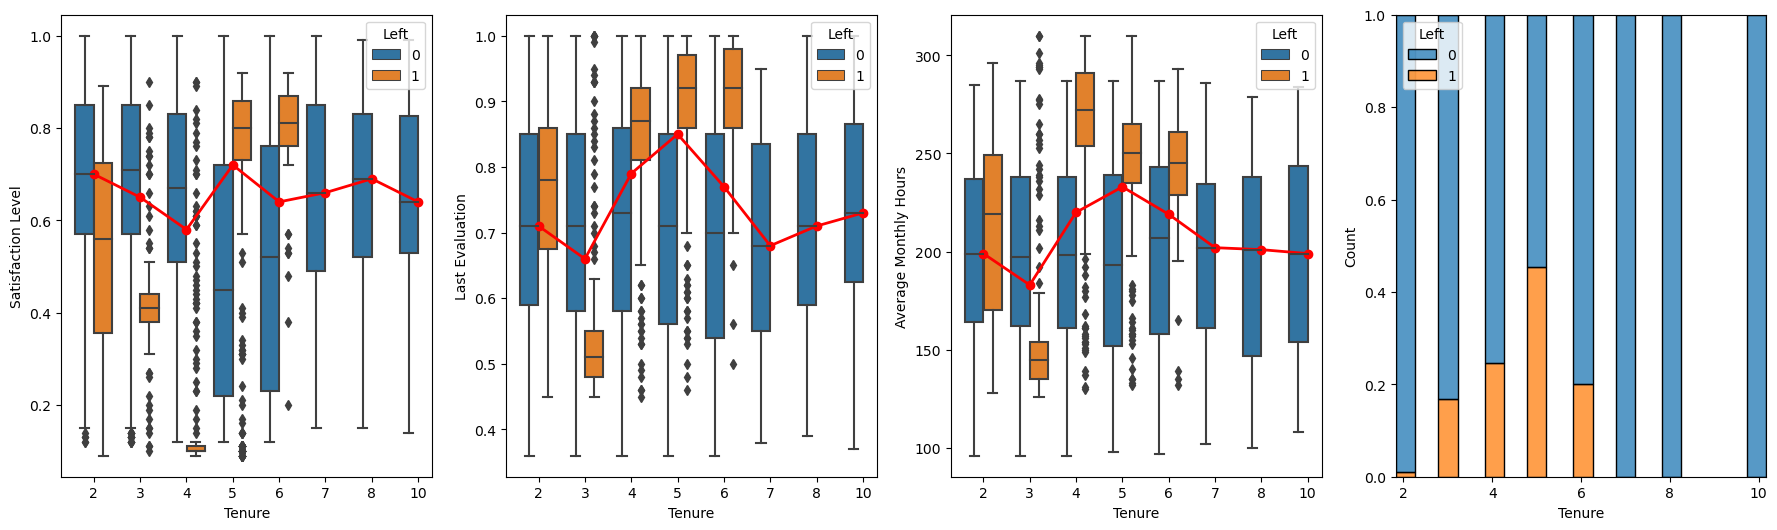

In [39]:
fig, ax = plt.subplots(1, 4, figsize=(22,6))

sns.boxplot(data=df1, x="Tenure", y="Satisfaction Level", hue="Left", ax=ax[0])
ax[0].plot(group_tenure["Satisfaction Level"].values,'r-o',linewidth=2)

sns.boxplot(data=df1, x="Tenure", y="Last Evaluation", hue="Left", ax=ax[1])
ax[1].plot(group_tenure["Last Evaluation"].values,'r-o',linewidth=2)

sns.boxplot(data=df1, x="Tenure", y="Average Monthly Hours", hue="Left", ax=ax[2])
ax[2].plot(group_tenure["Average Monthly Hours"].values,'r-o',linewidth=2)

sns.histplot(data=df1, x="Tenure", hue="Left", multiple="fill", shrink=5, ax=ax[3])
plt.show()

- the majority of employees leave in years 4-6 
    - the employees who left at this time tend to work more hours and have higher evaluation scores than those who stayed


- employees are most likely to leave between 3 and 6 years of tenure with a spike at 5 years, why?
- what is the impact of promotion and salary range on tenure vs left?

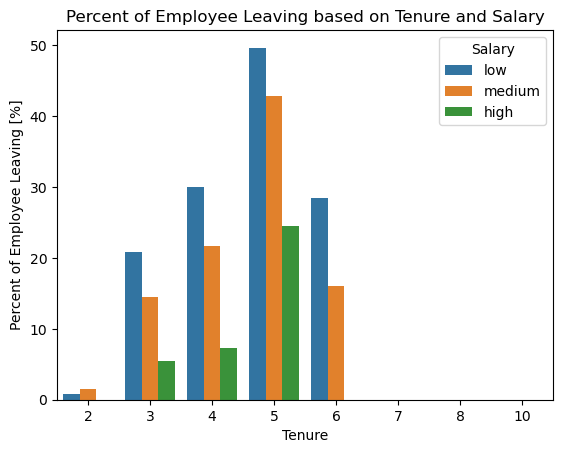

In [40]:
chance_of_left_tenure_salary = df1[["Tenure","Left","Salary"]].groupby(["Tenure","Salary"]).mean()
chance_of_left_tenure_salary.reset_index(inplace=True)
chance_of_left_tenure_salary["Left"] = chance_of_left_tenure_salary["Left"]*100

ax = sns.barplot(chance_of_left_tenure_salary, x="Tenure", y="Left", hue="Salary", hue_order=["low","medium","high"])
ax.set_ylabel("Percent of Employee Leaving [%]")
ax.set_title("Percent of Employee Leaving based on Tenure and Salary")
plt.show()

- increasing an employees salary from low to medium results in roughly a 5-10 percentage point decrease in their chance of leaving
- increasing an employees salary from medium to high reults in roughly a 10-15 percentage point decrease in their chance of leaving
- depending on the cost of new hires and the actual salary ranges: giving more raises to high value employees may be less expensive than making new hires
    - this can be analysed if actual employee salaries are provided and/or the dollar amounts that correspond to 'low', 'medium, and 'high'

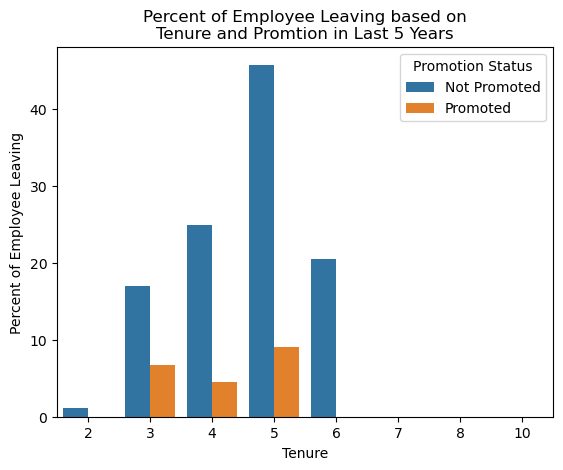

In [41]:
chance_of_left_tenure_promo = df1[["Tenure","Left","Promotion in Last 5 Years"]].groupby(["Tenure","Promotion in Last 5 Years"]).mean()
chance_of_left_tenure_promo.reset_index(inplace=True)
chance_of_left_tenure_promo["Left"] = chance_of_left_tenure_promo["Left"]*100
chance_of_left_tenure_promo["Promotion Status"] = chance_of_left_tenure_promo["Promotion in Last 5 Years"].map({0:"Not Promoted",1:"Promoted"})

ax = sns.barplot(chance_of_left_tenure_promo, x="Tenure", y="Left", hue="Promotion Status")
ax.set_ylabel("Percent of Employee Leaving")
ax.set_title("Percent of Employee Leaving based on\nTenure and Promtion in Last 5 Years")
plt.show()


- promoting valueble employees may be a highly effective way to retain them and reduce turnover of the best people
- there are only so many position to promote employees into, it is possible there isn't room for impovement here, but still worth a review of promotions in the compary
- could more be done to train up in house talent and reduce outside hires?

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data
- Questions
    - Is anything odd?
    - Which independent variables should be used for the model and why?
    - Are each of the assumptions met?
    - How well does the model fit the data?
    - Can the model be improved? Is there anything to change about the model?
    - What resources were used to complete this stage? (Include links)
    - Are there ethical considerations in this stage?


## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Type of prediction task.

- Binarly Classification

### Types of models most appropriate for this task.

- Logistic regression
- Tree based models
- Naive bayes models
- SVM
- KNN
- Deep learning models

### Modeling

In [42]:
# load models or fit models
load_saved_models = True

In [43]:
def results_table(model_name, predictions, y_values, results_table=None):
    if type(results_table) == type(None):
        results_table = pd.DataFrame(columns=["Model","Accuracy","Precision","Recall","F1"])
    
    accuracy = metrics.accuracy_score(y_values, predictions)
    precision = metrics.precision_score(y_values, predictions)
    recall = metrics.recall_score(y_values, predictions)
    f1 = metrics.f1_score(y_values, predictions)
    
    results_table.loc[len(results_table.index)] = [model_name, accuracy, precision, recall, f1] 
    return results_table

In [44]:
def display_confusion_matrix(y_train, train_pred, y_test, test_pred, clf, clf_type):
    cm = metrics.confusion_matrix(y_train, train_pred, labels = clf.classes_, normalize="all")
    cm = np.around(cm*100,decimals=1)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ["Not Left", "Left"])
    disp.plot(values_format='')
    plt.title(f"Confustion Matrix in Percents\n{clf_type} Classifier\nTrain Dataset")
    plt.show()

    cm = metrics.confusion_matrix(y_test, test_pred, labels = clf.classes_, normalize="all")
    cm = np.around(cm*100,decimals=1)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ["Not Left", "Left"])
    disp.plot(values_format='')
    plt.title(f"Confustion Matrix in Percents\n{clf_type} Classifier\nTest Dataset")
    plt.show()

In [45]:
def results(model_type, clf, X_train, X_test, y_train, y_test, summary_train=None, summary_test=None):
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    display_confusion_matrix(y_train, train_pred, y_test, test_pred, clf, model_type)

    models_summary_train = results_table(f"{model_type} Train", y_train, train_pred, results_table=summary_train)
    models_summary_test = results_table(f"{model_type} Test", y_test, test_pred, results_table=summary_test)
    return models_summary_train, models_summary_test

#### Logistic Regression

- No multicolinearity assumption looks good
- Independent observations is good
- Outliers from tenure will be removed
- There is NOT linearity between features and logit of probability of Left.

This model is unlikely to yield good results. But it will be tested because of how explainable the model is.

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Satisfaction Level         11991 non-null  float64
 1   Last Evaluation            11991 non-null  float64
 2   Number of Projects         11991 non-null  int64  
 3   Average Monthly Hours      11991 non-null  int64  
 4   Tenure                     11991 non-null  int64  
 5   Work Accident              11991 non-null  int64  
 6   Left                       11991 non-null  int64  
 7   Promotion in Last 5 Years  11991 non-null  int64  
 8   Department                 11991 non-null  object 
 9   Salary                     11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [47]:
df2 = df1.copy()

# encode salary as ordinals
df2["Salary"] = df2["Salary"].astype("category").cat.set_categories(["low","medium","high"]).cat.codes

df2 = pd.get_dummies(df2)
df2.head()

Satisfaction Level  Last Evaluation  Number of Projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   Average Monthly Hours  Tenure  Work Accident  Left  \
0                    157       3              0     1   
1                    262       6              0     1   
2                    272       4              0     1   
3                    223       5              0     1   
4                    159       3              0     1   

   Promotion in Last 5 Years  Salary  Department_IT  Department_RandD  \
0                          0       0              0                 0   
1                          0       1              0                 0   
2                          0       1              0                 0   
3                          0       0              0                 0   
4                          0       0              0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   Department_marketing  Department_product_mng  Department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   Department_support  Department_technical  
0                   0                     0  
1                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0

In [48]:
# make train and test datasets
X = df2.drop(columns=["Left"])
y = df2["Left"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

# drop tenure outliers from training dataset
df_train_subset = pd.concat([X_train, y_train], axis=1)
df_train_subset = df_train_subset[df_train_subset["Tenure"]<6]

X_train_subset = df_train_subset.drop(columns=["Left"])
y_train_subset = df_train_subset["Left"]

In [49]:
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train_subset,y_train_subset)

print(clf.coef_)
print(clf.intercept_)

[[-4.42002705e+00 -1.35089585e-01 -4.62432323e-01  3.50573261e-03
   1.05010534e+00 -1.44246502e+00 -4.13877880e-01 -5.60539542e-01
  -2.59793292e-02 -4.99653945e-01 -3.66963656e-02 -1.22829235e-02
  -2.36645499e-01 -1.12212033e-02 -2.25491642e-01  7.16047550e-02
  -1.27139493e-01  1.06829128e-02]]
[-1.09282273]


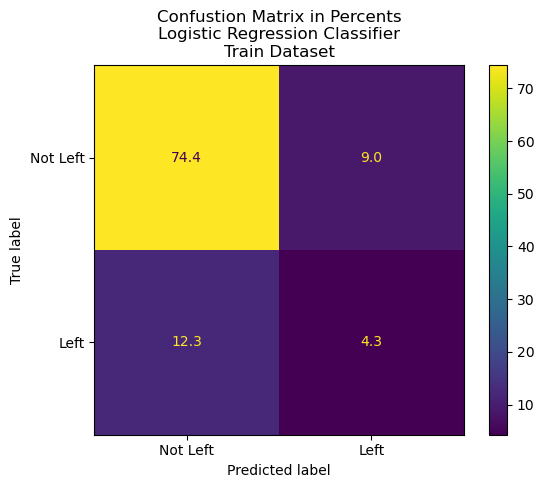

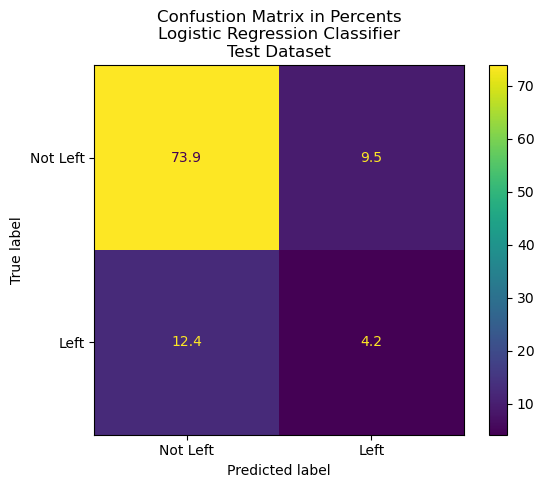

Model  Accuracy  Precision    Recall        F1
0  Logistic Regression Test  0.781267   0.254606  0.307692  0.278643

In [50]:
models_summary_train, models_summary_test = results("Logistic Regression", clf, X_train, X_test, y_train, y_test, summary_train=None, summary_test=None)
models_summary_test

Not very good results, check what features have a significant p-value

In [51]:
clf_1 = Logit(y_train_subset, X_train_subset).fit()

Optimization terminated successfully.
         Current function value: 0.317376
         Iterations 7


In [52]:
clf_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Left   No. Observations:                 7803
Model:                          Logit   Df Residuals:                     7785
Method:                           MLE   Df Model:                           17
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.2977
Time:                        20:05:55   Log-Likelihood:                -2476.5
converged:                       True   LL-Null:                       -3526.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Satisfaction Level           -4.5241      0.164    -27.609      0.000      -4.845      -4.203
Last Evaluation              -0.0995      0.242     -0.411      0.681      -0.573       0.374
Number of Projects           -0.4741      0.036    -13.341      0.000      -0.544      -0.404
Average Monthly Hours         0.0037      0.001      4.404      0.000       0.002       0.005
Tenure                        1.0667      0.047     22.553      0.000       0.974       1.159
Work Accident                -1.4717      0.144    -10.214      0.000      -1.754      -1.189
Promotion in Last 5 Years    -0.6352      0.437     -1.453      0.146      -1.492       0.222
Salary                       -0.5619      0.062     -9.019      0.000      -0.684      -0.440
Department_IT                -1.1447      0.242     -4.721      0.000      -1.620      -0.669
Department_RandD             -1.6224      0.271     -5.982      0.000      -2.154      -1.091
Department_accounting        -1.1515      0.256     -4.501      0.000      -1.653      -0.650
Department_hr                -1.1259      0.257     -4.380      0.000      -1.630      -0.622
Department_management        -1.3574      0.312     -4.347      0.000      -1.969      -0.745
Department_marketing         -1.1209      0.257     -4.369      0.000      -1.624      -0.618
Department_product_mng       -1.3453      0.257     -5.225      0.000      -1.850      -0.841
Department_sales             -1.0425      0.217     -4.801      0.000      -1.468      -0.617
Department_support           -1.2419      0.226     -5.503      0.000      -1.684      -0.800
Department_technical         -1.0953      0.222     -4.923      0.000      -1.531      -0.659
=============================================================================================
"""

In [53]:
clf_2 = Logit(y_train_subset, X_train_subset[["Satisfaction Level","Number of Projects","Tenure","Average Monthly Hours","Promotion in Last 5 Years"]]).fit()

Optimization terminated successfully.
         Current function value: 0.336350
         Iterations 7


In [54]:
clf_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Left   No. Observations:                 7803
Model:                          Logit   Df Residuals:                     7798
Method:                           MLE   Df Model:                            4
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.2557
Time:                        20:05:55   Log-Likelihood:                -2624.5
converged:                       True   LL-Null:                       -3526.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Satisfaction Level           -5.0744      0.142    -35.655      0.000      -5.353      -4.795
Number of Projects           -0.4963      0.033    -15.111      0.000      -0.561      -0.432
Tenure                        0.8458      0.038     22.048      0.000       0.771       0.921
Average Monthly Hours         0.0012      0.001      1.694      0.090      -0.000       0.003
Promotion in Last 5 Years    -0.9828      0.425     -2.313      0.021      -1.816      -0.150
=============================================================================================
"""

Logistic Regression really doesn't seem to be a good fit. Linearity isn't satisfied and pseudo R2 is really poor. This model could be refined further but it is not likely to improve enough.

Try tree based models:

#### Decision Tree

In [55]:
clf_dt = DecisionTreeClassifier(random_state=42)

parameters = {'criterion' : ["gini", "entropy", "log_loss"], 
              'max_depth' : [8, 9, 10],        
              'min_samples_leaf' : [1, 2, 3], 
              'min_samples_split' : [0.001, 0.002, 0.003, 0.004, 0.005],
              'max_features' : ["sqrt", "log2", None]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

dt_cv = GridSearchCV(clf_dt,
                     parameters,
                     refit="f1", 
                     cv=5, 
                     scoring=scoring,
                     n_jobs=-1, 
                     verbose=1)

# load model or fit new model
filename = "Models/desision_tree_classifier.pkl"
if load_saved_models:
    dt_cv = pickle.load(open(filename,"rb"))
else:
    dt_cv.fit(X_train, y_train)
    pickle.dump(dt_cv, open(filename,"wb"))

In [56]:
dt_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8,
                       min_samples_split=0.003, random_state=42)

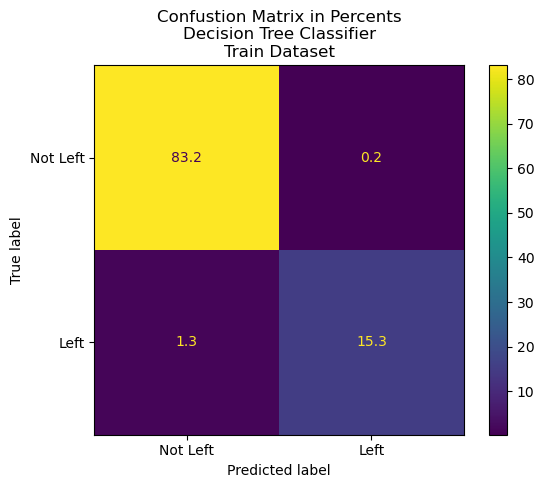

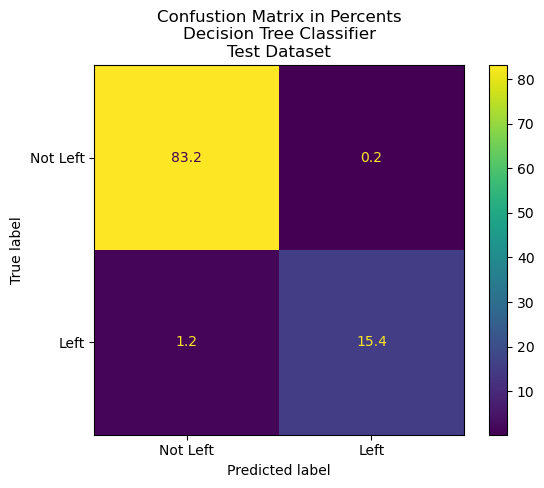

Model  Accuracy  Precision    Recall        F1
0  Logistic Regression Test  0.781267   0.254606  0.307692  0.278643
1        Decision Tree Test  0.986103   0.927973  0.987522  0.956822

In [57]:
models_summary_train, models_summary_test = results("Decision Tree", dt_cv, X_train, X_test, y_train, y_test, models_summary_train, models_summary_test)
models_summary_test

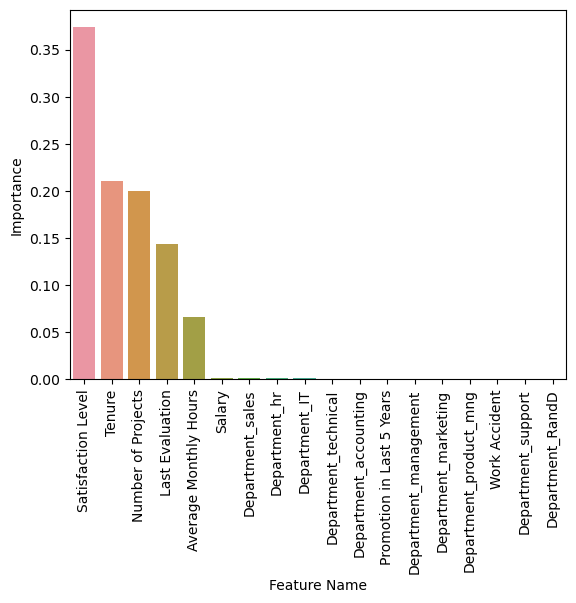

In [58]:
feature_import = dt_cv.best_estimator_.feature_importances_
feature_names = X_train.columns
features_importances = pd.DataFrame({"Feature Name":feature_names, "Importance":feature_import})
features_importances.sort_values(by="Importance", inplace=True, ascending=False)

sns.barplot(data=features_importances, x="Feature Name", y="Importance")
plt.xticks(rotation=90)
plt.show()

#### Decision Tree - Key Features Only

In [59]:
dt_key_features = ["Satisfaction Level","Tenure","Number of Projects","Last Evaluation","Average Monthly Hours"]

parameters = {'criterion' : ["gini", "entropy", "log_loss"], 
              'max_depth' : [8, 9, 10],        
              'min_samples_leaf' : [1, 2, 3], 
              'min_samples_split' : [0.001, 0.002, 0.003, 0.004, 0.005],
              'max_features' : ["sqrt", "log2", None]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

dt_cv2 = GridSearchCV(clf_dt,
                     parameters,
                     refit="f1", 
                     cv=5, 
                     scoring=scoring,
                     n_jobs=-1, 
                     verbose=1)


# load model or fit new model
filename = "Models/desision_tree_classifier_key_features.pkl"
if load_saved_models:
    dt_cv2 = pickle.load(open(filename,"rb"))
else:
    dt_cv2.fit(X_train[dt_key_features], y_train)
    pickle.dump(dt_cv2, open(filename,"wb"))

In [60]:
dt_cv2.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       min_samples_split=0.003, random_state=42)

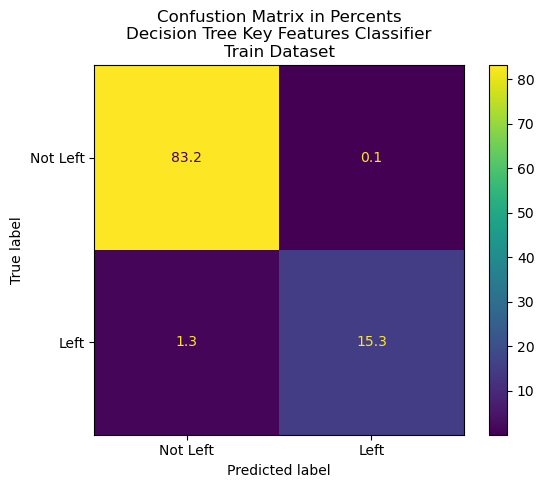

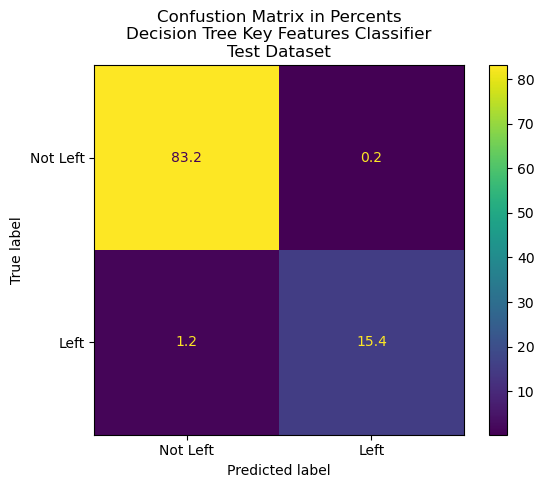

Model  Accuracy  Precision    Recall        F1
0         Logistic Regression Test  0.781267   0.254606  0.307692  0.278643
1               Decision Tree Test  0.986103   0.927973  0.987522  0.956822
2  Decision Tree Key Features Test  0.986381   0.927973  0.989286  0.957649

In [61]:
models_summary_train, models_summary_test = results("Decision Tree Key Features", dt_cv2, X_train[dt_key_features], X_test[dt_key_features], y_train, y_test, models_summary_train, models_summary_test)
models_summary_test

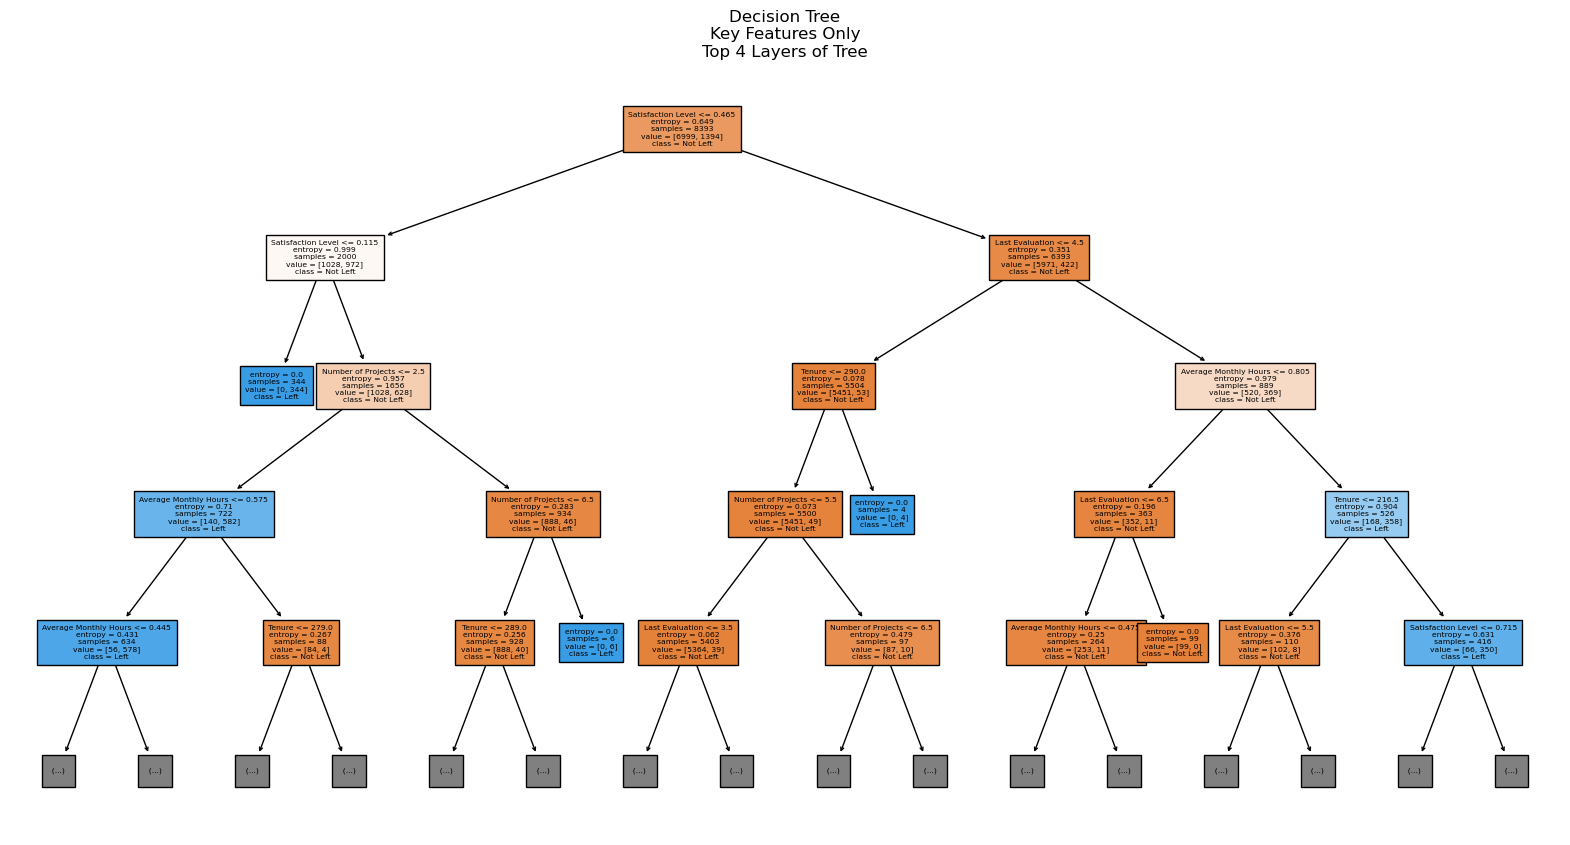

In [62]:
plt.figure(figsize=(20,10))
plot_tree(dt_cv2.best_estimator_, 
          max_depth=4, 
          feature_names = df1.columns.values,
          class_names = ["Not Left", "Left"],
          filled=True,
          fontsize=5.5)
plt.title("Decision Tree\nKey Features Only\nTop 4 Layers of Tree")
plt.show()

#### Random Forest

In [63]:
clf_rf = RandomForestClassifier(random_state=42)

parameters = {'n_estimators' : [100,125,150,175], 
              'max_depth' : [10,20,30],        
              'min_samples_leaf' : [1,2], 
              'min_samples_split' : [0.001, 0.002],
              'max_samples' : [0.80,0.85,0.90]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_cv = GridSearchCV(clf_rf,
                     parameters,
                     refit="f1", 
                     cv=5, 
                     scoring=scoring,
                     n_jobs=-1, 
                     verbose=1)



# load model or fit new model
filename = "Models/random_forest_classifier.pkl"
if load_saved_models:
    rf_cv = pickle.load(open(filename,"rb"))
else:
    rf_cv.fit(X_train, y_train)
    pickle.dump(rf_cv, open(filename,"wb"))

In [64]:
rf_cv.best_estimator_

RandomForestClassifier(max_depth=20, max_samples=0.9, min_samples_split=0.001,
                       n_estimators=125, random_state=42)

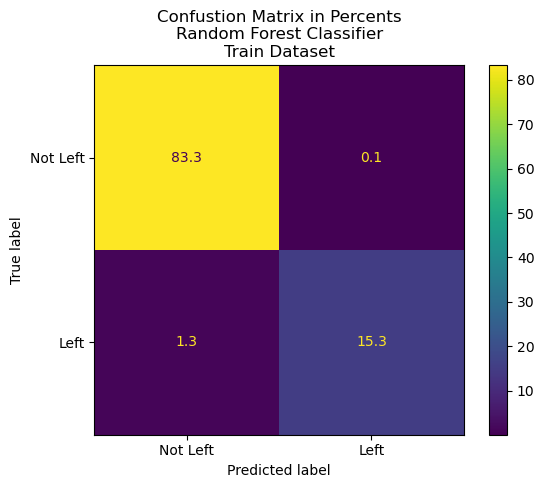

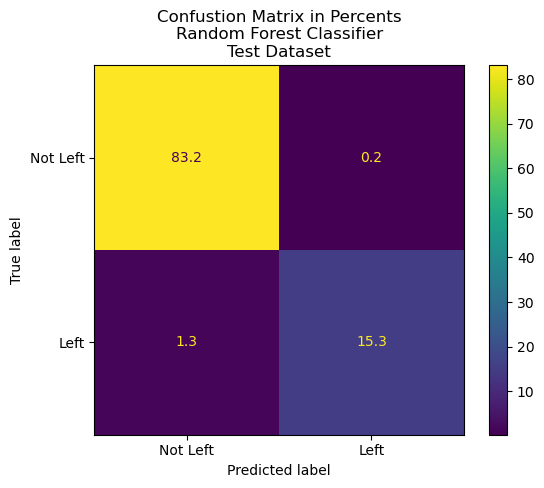

Model  Accuracy  Precision    Recall        F1
0         Logistic Regression Test  0.781267   0.254606  0.307692  0.278643
1               Decision Tree Test  0.986103   0.927973  0.987522  0.956822
2  Decision Tree Key Features Test  0.986381   0.927973  0.989286  0.957649
3               Random Forest Test  0.984992   0.921273  0.987433  0.953206

In [65]:
models_summary_train, models_summary_test = results("Random Forest", rf_cv, X_train, X_test, y_train, y_test, models_summary_train, models_summary_test)
models_summary_test

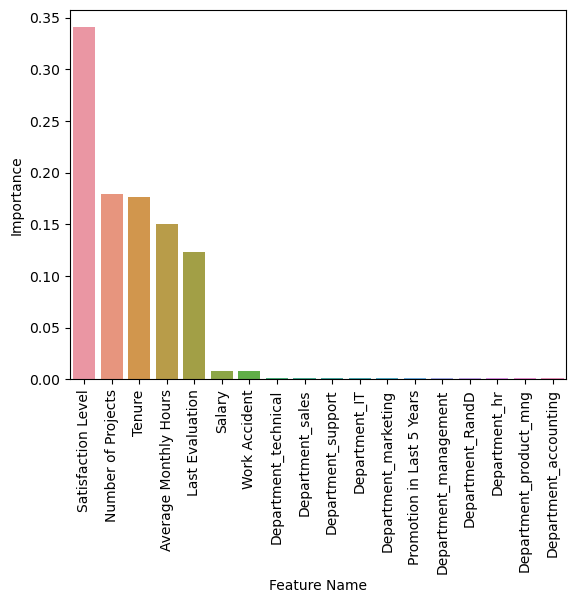

In [66]:
feature_import = rf_cv.best_estimator_.feature_importances_
feature_names = X_train.columns
features_importances = pd.DataFrame({"Feature Name":feature_names, "Importance":feature_import})
features_importances.sort_values(by="Importance", inplace=True, ascending=False)

sns.barplot(data=features_importances, x="Feature Name", y="Importance")
plt.xticks(rotation=90)
plt.show()


#### Random Forest - Key Features Only
Try again without using department or promotion information:

In [67]:
rf_cv2 = GridSearchCV(clf_rf,
                     parameters,
                     refit="f1", 
                     cv=5, 
                     scoring=scoring,
                     n_jobs=-1, 
                     verbose=1)

key_features = ["Satisfaction Level","Number of Projects","Tenure","Average Monthly Hours","Last Evaluation",
                    "Work Accident","Salary"]



# load model or fit new model
filename = "Models/random_forest_classifier_key_features.pkl"
if load_saved_models:
    rf_cv2 = pickle.load(open(filename,"rb"))
else:
    rf_cv2.fit(X_train[key_features], y_train)
    pickle.dump(rf_cv2, open(filename,"wb"))

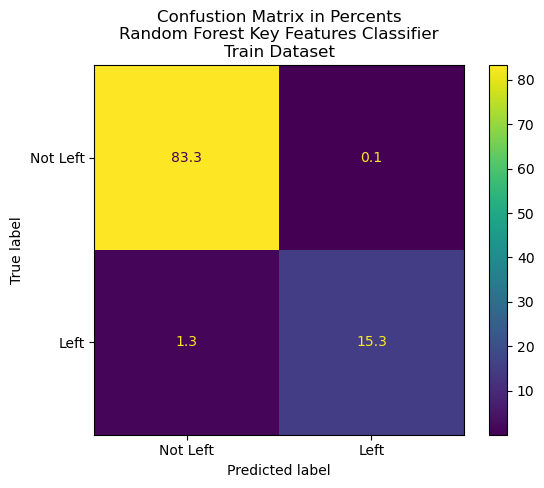

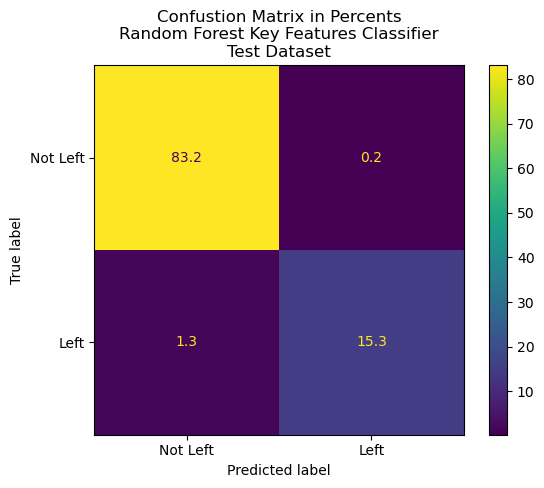

Model  Accuracy  Precision    Recall        F1
0         Logistic Regression Test  0.781267   0.254606  0.307692  0.278643
1               Decision Tree Test  0.986103   0.927973  0.987522  0.956822
2  Decision Tree Key Features Test  0.986381   0.927973  0.989286  0.957649
3               Random Forest Test  0.984992   0.921273  0.987433  0.953206
4  Random Forest Key Features Test  0.985825   0.924623  0.989247  0.955844

In [68]:
models_summary_train, models_summary_test = results("Random Forest Key Features", rf_cv2, X_train[key_features], X_test[key_features], y_train, y_test, models_summary_train, models_summary_test)
models_summary_test

#### Gradient Boosted Forest

In [69]:
xgb = XGBClassifier(objective="binary:logistic", random_state=42)

cv_params = {'max_depth': [7, 8, 9],
              'min_child_weight': [1, 2],
              'learning_rate': [0.15, 0.20, 0.25],
              'n_estimators': [25 ,30 ,35],
              'subsample': [0.75, 0.8, 0.85],
              'colsample_bytree': [0.90, 0.95, 1.00]
              }

xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1',
                      n_jobs=-1, 
                      verbose=1)



# load model or fit new model
filename = "Models/xgboost_classifier.pkl"
if load_saved_models:
    xgb_cv = pickle.load(open(filename,"rb"))
else:
    xgb_cv.fit(X_train, y_train)
    pickle.dump(xgb_cv, open(filename,"wb"))

In [70]:
xgb_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=35, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

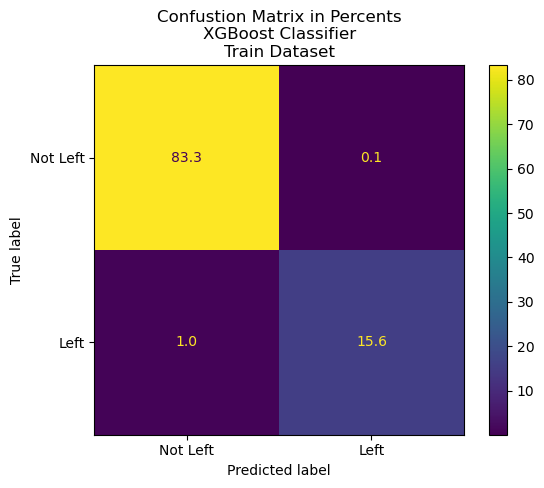

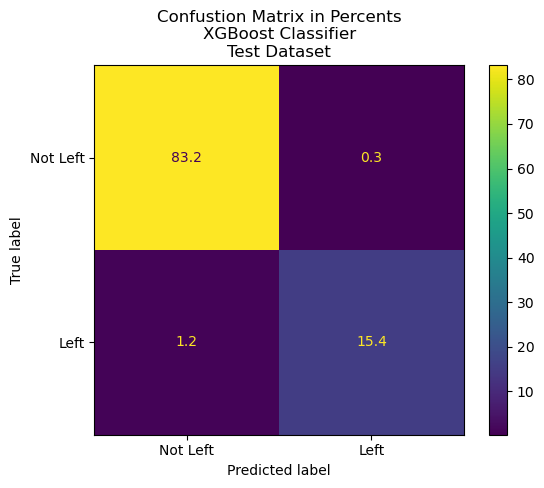

Model  Accuracy  Precision    Recall        F1
0         Logistic Regression Test  0.781267   0.254606  0.307692  0.278643
1               Decision Tree Test  0.986103   0.927973  0.987522  0.956822
2  Decision Tree Key Features Test  0.986381   0.927973  0.989286  0.957649
3               Random Forest Test  0.984992   0.921273  0.987433  0.953206
4  Random Forest Key Features Test  0.985825   0.924623  0.989247  0.955844
5                     XGBoost Test  0.985825   0.929648  0.984043  0.956072

In [71]:
models_summary_train, models_summary_test = results("XGBoost", xgb_cv, X_train, X_test, y_train, y_test, models_summary_train, models_summary_test)
models_summary_test

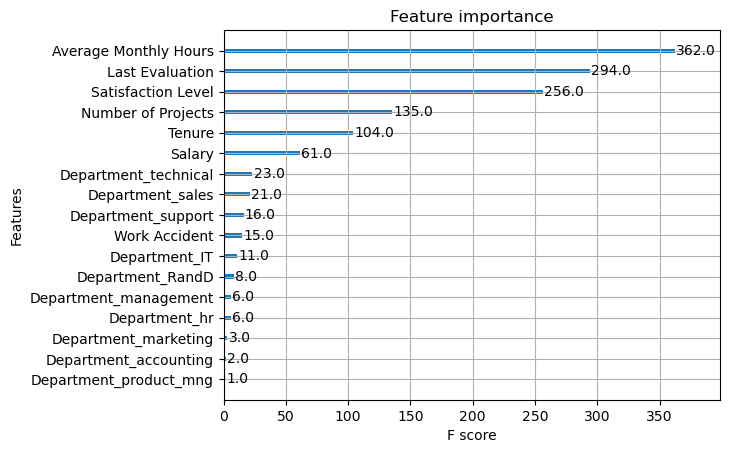

In [72]:
plot_importance(xgb_cv.best_estimator_)
plt.show()

#### Gradient Boosted Forest - Key Features Only

In [73]:
xgb_cv2 = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1',
                      n_jobs=-1, 
                      verbose=1)

# load model or fit new model
filename = "Models/xgboost_classifier_key_features.pkl"
if load_saved_models:
    xgb_cv2 = pickle.load(open(filename,"rb"))
else:
    xgb_cv2.fit(X_train[key_features], y_train)
    pickle.dump(xgb_cv2, open(filename,"wb"))

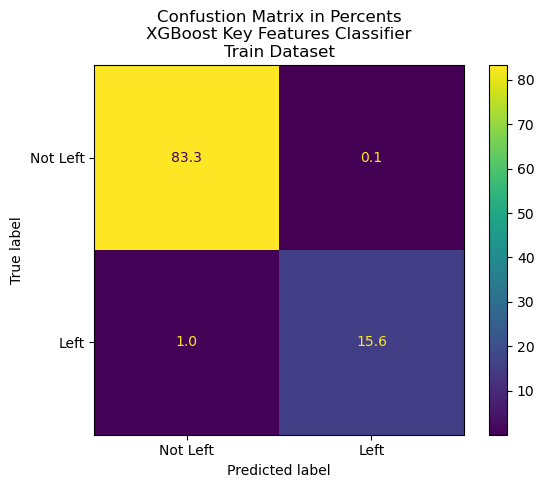

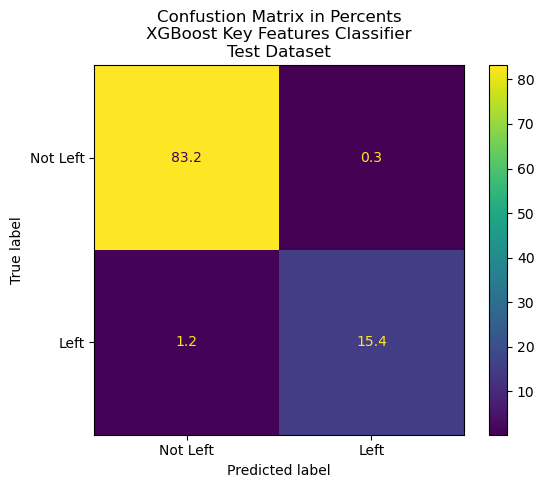

Model  Accuracy  Precision    Recall        F1
0         Logistic Regression Test  0.781267   0.254606  0.307692  0.278643
1               Decision Tree Test  0.986103   0.927973  0.987522  0.956822
2  Decision Tree Key Features Test  0.986381   0.927973  0.989286  0.957649
3               Random Forest Test  0.984992   0.921273  0.987433  0.953206
4  Random Forest Key Features Test  0.985825   0.924623  0.989247  0.955844
5                     XGBoost Test  0.985825   0.929648  0.984043  0.956072
6        XGBoost Key Features Test  0.985548   0.927973  0.984014  0.955172

In [74]:
models_summary_train, models_summary_test = results("XGBoost Key Features", xgb_cv2, X_train[key_features], X_test[key_features], y_train, y_test, models_summary_train, models_summary_test)
models_summary_test

#### Naive Bayes Models
Note: The dataset does not meet the distribution assumptions for any naive bayes model.

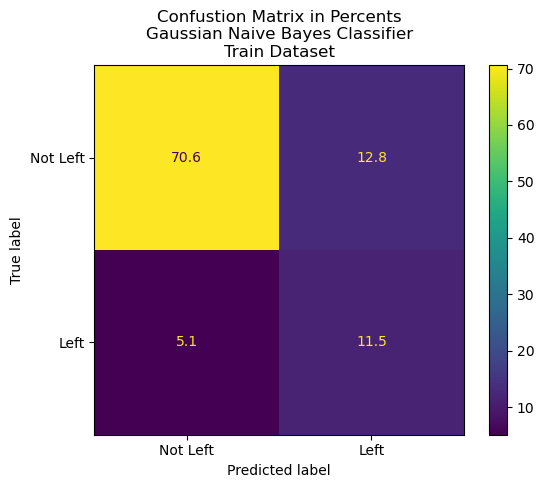

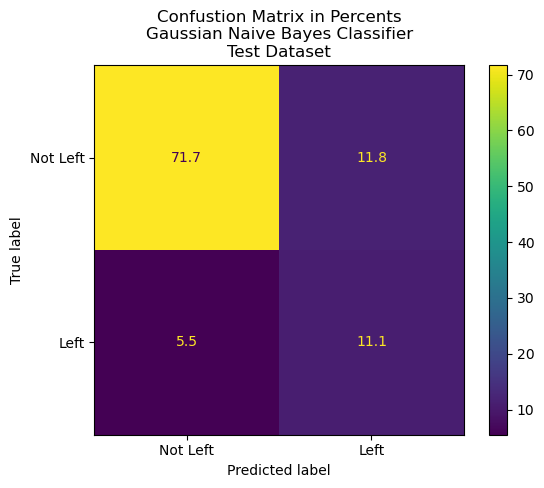

Model  Accuracy  Precision    Recall        F1
0         Logistic Regression Test  0.781267   0.254606  0.307692  0.278643
1               Decision Tree Test  0.986103   0.927973  0.987522  0.956822
2  Decision Tree Key Features Test  0.986381   0.927973  0.989286  0.957649
3               Random Forest Test  0.984992   0.921273  0.987433  0.953206
4  Random Forest Key Features Test  0.985825   0.924623  0.989247  0.955844
5                     XGBoost Test  0.985825   0.929648  0.984043  0.956072
6        XGBoost Key Features Test  0.985548   0.927973  0.984014  0.955172
7        Gaussian Naive Bayes Test  0.827682   0.670017  0.486027  0.563380

In [75]:
nb_gaussian = GaussianNB()
nb_gaussian.fit(X_train, y_train)

models_summary_train, models_summary_test = results("Gaussian Naive Bayes", nb_gaussian, X_train, X_test, y_train, y_test, models_summary_train, models_summary_test)
models_summary_test

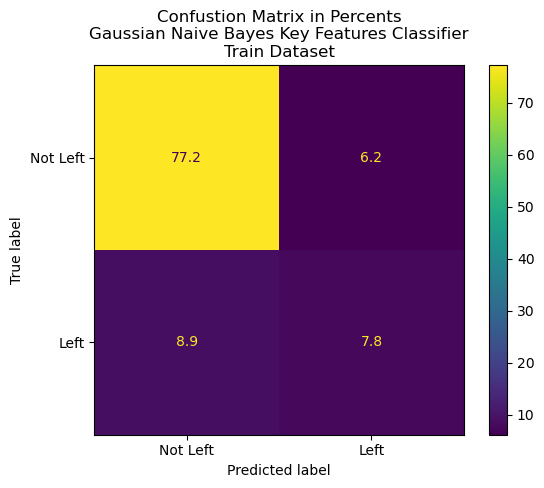

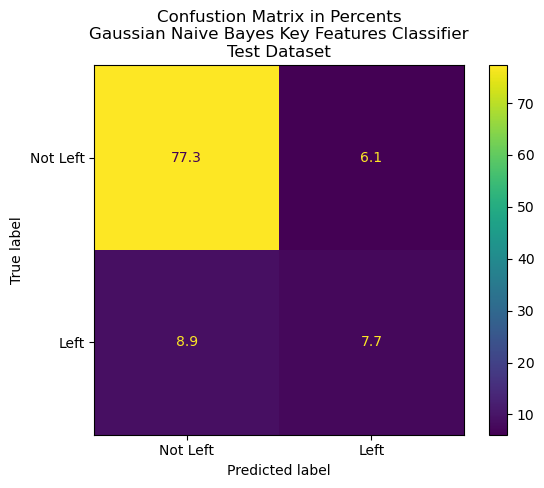

Model  Accuracy  Precision    Recall  \
0                Logistic Regression Test  0.781267   0.254606  0.307692   
1                      Decision Tree Test  0.986103   0.927973  0.987522   
2         Decision Tree Key Features Test  0.986381   0.927973  0.989286   
3                      Random Forest Test  0.984992   0.921273  0.987433   
4         Random Forest Key Features Test  0.985825   0.924623  0.989247   
5                            XGBoost Test  0.985825   0.929648  0.984043   
6               XGBoost Key Features Test  0.985548   0.927973  0.984014   
7               Gaussian Naive Bayes Test  0.827682   0.670017  0.486027   
8  Gaussian Naive Bayes Key Features Test  0.849917   0.465662  0.557114   

         F1  
0  0.278643  
1  0.956822  
2  0.957649  
3  0.953206  
4  0.955844  
5  0.956072  
6  0.955172  
7  0.563380  
8  0.507299

In [76]:
nb_gaussian2 = GaussianNB()
nb_gaussian2.fit(X_train[key_features], y_train)

models_summary_train, models_summary_test = results("Gaussian Naive Bayes Key Features", nb_gaussian2, X_train[key_features], X_test[key_features], y_train, y_test, models_summary_train, models_summary_test)
models_summary_test

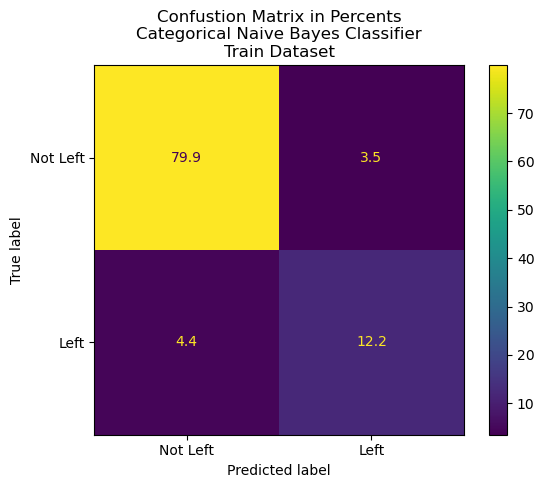

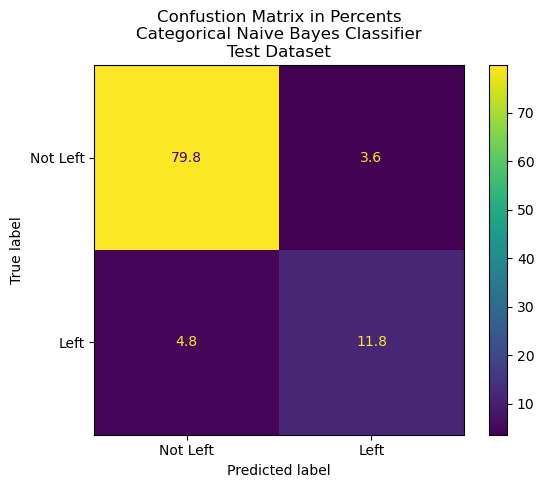

Model  Accuracy  Precision    Recall  \
0                Logistic Regression Test  0.781267   0.254606  0.307692   
1                      Decision Tree Test  0.986103   0.927973  0.987522   
2         Decision Tree Key Features Test  0.986381   0.927973  0.989286   
3                      Random Forest Test  0.984992   0.921273  0.987433   
4         Random Forest Key Features Test  0.985825   0.924623  0.989247   
5                            XGBoost Test  0.985825   0.929648  0.984043   
6               XGBoost Key Features Test  0.985548   0.927973  0.984014   
7               Gaussian Naive Bayes Test  0.827682   0.670017  0.486027   
8  Gaussian Naive Bayes Key Features Test  0.849917   0.465662  0.557114   
9            Categorical Naive Bayes Test  0.916620   0.713568  0.767568   

         F1  
0  0.278643  
1  0.956822  
2  0.957649  
3  0.953206  
4  0.955844  
5  0.956072  
6  0.955172  
7  0.563380  
8  0.507299  
9  0.739583

In [77]:
nb_cat = CategoricalNB()
nb_cat.fit(X_train,y_train)

models_summary_train, models_summary_test = results("Categorical Naive Bayes", nb_cat, X_train, X_test, y_train, y_test, models_summary_train, models_summary_test)
models_summary_test

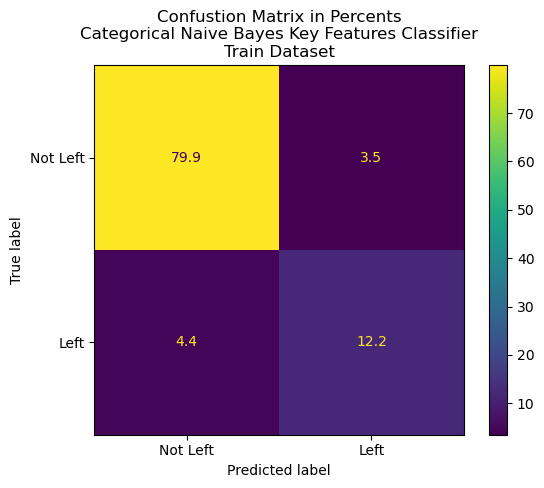

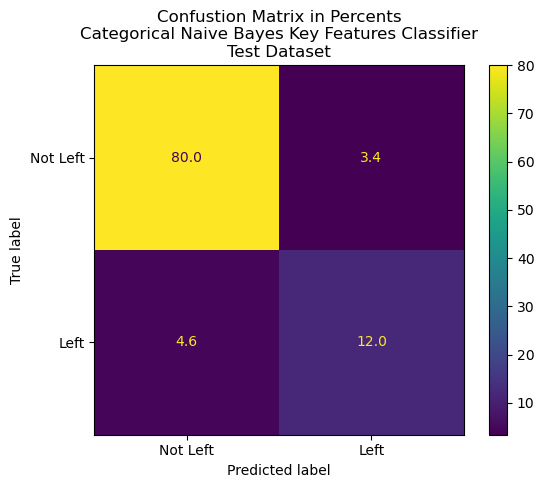

Model  Accuracy  Precision    Recall  \
0                    Logistic Regression Test  0.781267   0.254606  0.307692   
1                          Decision Tree Test  0.986103   0.927973  0.987522   
2             Decision Tree Key Features Test  0.986381   0.927973  0.989286   
3                          Random Forest Test  0.984992   0.921273  0.987433   
4             Random Forest Key Features Test  0.985825   0.924623  0.989247   
5                                XGBoost Test  0.985825   0.929648  0.984043   
6                   XGBoost Key Features Test  0.985548   0.927973  0.984014   
7                   Gaussian Naive Bayes Test  0.827682   0.670017  0.486027   
8      Gaussian Naive Bayes Key Features Test  0.849917   0.465662  0.557114   
9                Categorical Naive Bayes Test  0.916620   0.713568  0.767568   
10  Categorical Naive Bayes Key Features Test  0.919678   0.723618  0.776978   

          F1  
0   0.278643  
1   0.956822  
2   0.957649  
3   0.953206  
4   0.955844  
5   0.956072  
6   0.955172  
7   0.563380  
8   0.507299  
9   0.739583  
10  0.749350

In [78]:
nb_cat2 = CategoricalNB()
nb_cat2.fit(X_train[key_features],y_train)

models_summary_train, models_summary_test = results("Categorical Naive Bayes Key Features", nb_cat2, X_train[key_features], X_test[key_features], y_train, y_test, models_summary_train, models_summary_test)
models_summary_test

#### Review Models

In [79]:
models_summary_test.sort_values("F1", ascending=False)

Model  Accuracy  Precision    Recall  \
2             Decision Tree Key Features Test  0.986381   0.927973  0.989286   
1                          Decision Tree Test  0.986103   0.927973  0.987522   
5                                XGBoost Test  0.985825   0.929648  0.984043   
4             Random Forest Key Features Test  0.985825   0.924623  0.989247   
6                   XGBoost Key Features Test  0.985548   0.927973  0.984014   
3                          Random Forest Test  0.984992   0.921273  0.987433   
10  Categorical Naive Bayes Key Features Test  0.919678   0.723618  0.776978   
9                Categorical Naive Bayes Test  0.916620   0.713568  0.767568   
7                   Gaussian Naive Bayes Test  0.827682   0.670017  0.486027   
8      Gaussian Naive Bayes Key Features Test  0.849917   0.465662  0.557114   
0                    Logistic Regression Test  0.781267   0.254606  0.307692   

          F1  
2   0.957649  
1   0.956822  
5   0.956072  
4   0.955844  
6   0.955172  
3   0.953206  
10  0.749350  
9   0.739583  
7   0.563380  
8   0.507299  
0   0.278643

In [80]:
models_summary_train.sort_values("F1", ascending=False)

Model  Accuracy  Precision    Recall  \
5                                XGBoost Train  0.988443   0.938307  0.991660   
6                   XGBoost Key Features Train  0.988443   0.936872  0.993156   
3                          Random Forest Train  0.985941   0.921808  0.993045   
4             Random Forest Key Features Train  0.985941   0.921808  0.993045   
2             Decision Tree Key Features Train  0.985226   0.919656  0.990726   
1                          Decision Tree Train  0.985107   0.921090  0.988453   
9                Categorical Naive Bayes Train  0.921244   0.736011  0.777862   
10  Categorical Naive Bayes Key Features Train  0.920767   0.736011  0.775510   
7                   Gaussian Naive Bayes Train  0.820446   0.691535  0.472317   
8      Gaussian Naive Bayes Key Features Train  0.849875   0.467001  0.557363   
0                    Logistic Regression Train  0.787442   0.261119  0.325581   

          F1  
5   0.964246  
6   0.964193  
3   0.956101  
4   0.956101  
2   0.953869  
1   0.953583  
9   0.756358  
10  0.755245  
7   0.561281  
8   0.508197  
0   0.289809

The key features version of the decision tree model has been selected for this project

- The two decision tree models have the best performance and the least amount of overfitting between the train and test data. 
- Desicion tree models are the most explanable of the models that had the top performances.
- The decision tree model with access to all features only used the 5 key features: Satisfaction Level, Tenure, Number of Projects , Last Evaluation, Average Monthly Hours. 
- Decision tree models have no assumptions about the data that need to be fulfilled.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders
- Questions
    - What key insights emerged from the model(s)?
    - What business recommendations should be propose based on the models built?
    - What potential recommendations should be made to the stakeholders?
    - Could the model be improved? Why or why not? How?
    - Given what is known about the data and the models being used, what other questions could be addressed for the stakeholders?
    - What resources were used to complete this stage? (Include links)
    - Are there any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

- Model overall test accuracy is 98%
- Of all employees in the test dataset who have left, the model correctly prediced 92% of them
- Of all employees the model predicted to leave, 99% of them did leave.
- If targeted approaches are applied to the employees who are expected to leave this would affect about 15.6% of employees. About 0.2% of those employees may not actually need anything extra to stay and about 1.2% of employees who could have benefited from a targeted approach would not recieve anything.

For this model the most important features to predict if an employee will leave in order is:
1) Satisfaction Level
    - But there is not a simple correlations between satisfaction level and likelihood of leaving
2) Tenure and Number of Projects
3) Last Evaluation and Average Monthly Hours



### Conclusion, Recommendations, Next Steps

- Have employees working on 3 or 4 projects only. Employees with more or less projects tend to leave.
- Have employees work between 37h/week and 50h/week. Employees who work more or less tend to leave.
- Review the salary and potential for promotion of employees with between 3-6 years at the company. Employees particularly at this stage with the company tend to leave when their salaries are lower and when not given promotions. It is possible more raises should be given. This depends on the relative costs of increased salaries versus and the cost of employee turnover.
- Employee evaluations should depend on the value created by an employee not the hours worked. Look for matrics that capture this value created. The relationship between working long hours and recieving high evaluation scores seems to be couterproductive because employees tend to leave when they work long hours.

**Ethical Considerations**
- If raises and promotions become primarily based on the models prediction of who is likely to leave the company than other quality employees may be overlooked.
- Employees who are predicted to leave may be given less important projects and less other opportunities. This is especially problematic if an employee was predicted to leave but wasn't actually going to. The model isn't perfect.

**Next Steps**
- If employee quit/fired status data is available:
    - preform data analysis to deterime the factors that are causing people to quit and be fired
    - refine model to predict stay, quit, and fired
- If employee salaries and an estimate of the cost of employee turnover is available:
    -  a cost analysis can be perfored to determine if/how many raises can reduce total cost to the compary

### Figures for Reports

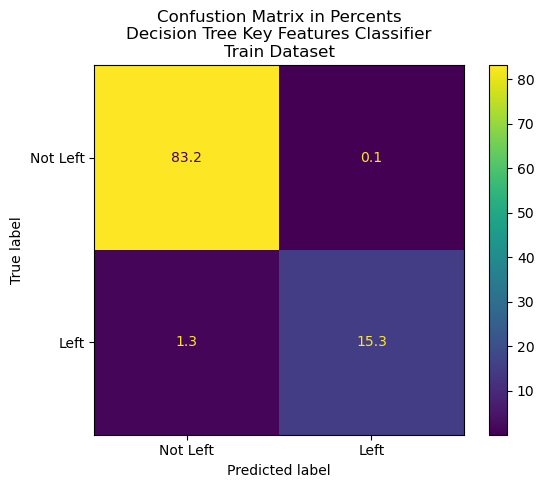

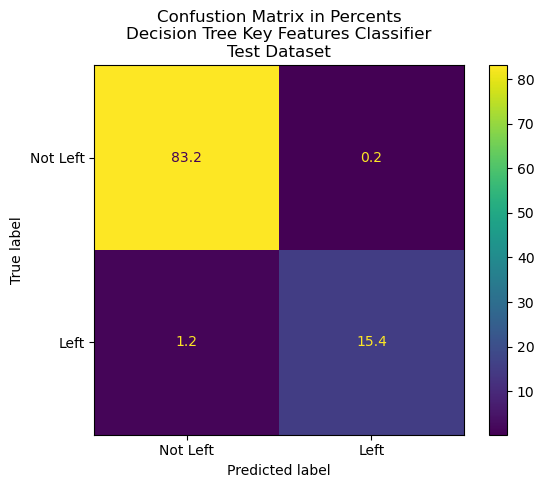

Model  Accuracy  Precision    Recall        F1
0  Decision Tree Key Features Test  0.986381   0.927973  0.989286  0.957649

In [81]:
# confusion matrix for best model
train_results, test_results = results("Decision Tree Key Features", dt_cv2, X_train[dt_key_features], X_test[dt_key_features], y_train, y_test)
test_results

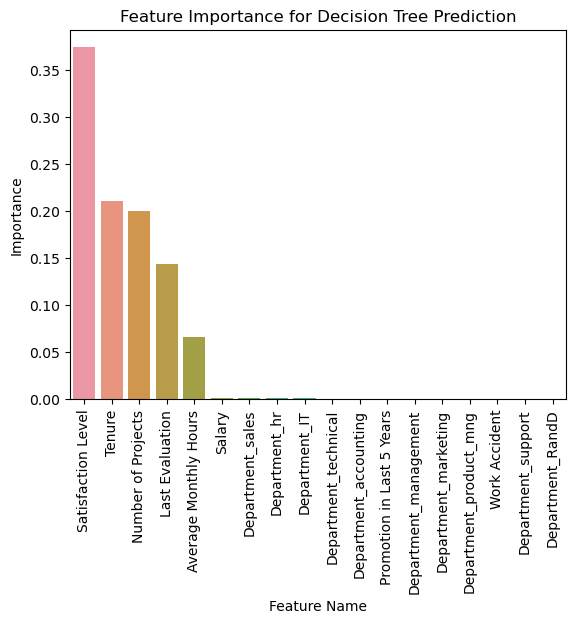

In [82]:
feature_import = dt_cv.best_estimator_.feature_importances_
feature_names = X_train.columns
features_importances = pd.DataFrame({"Feature Name":feature_names, "Importance":feature_import})
features_importances.sort_values(by="Importance", inplace=True, ascending=False)

sns.barplot(data=features_importances, x="Feature Name", y="Importance")
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree Prediction")
plt.show()

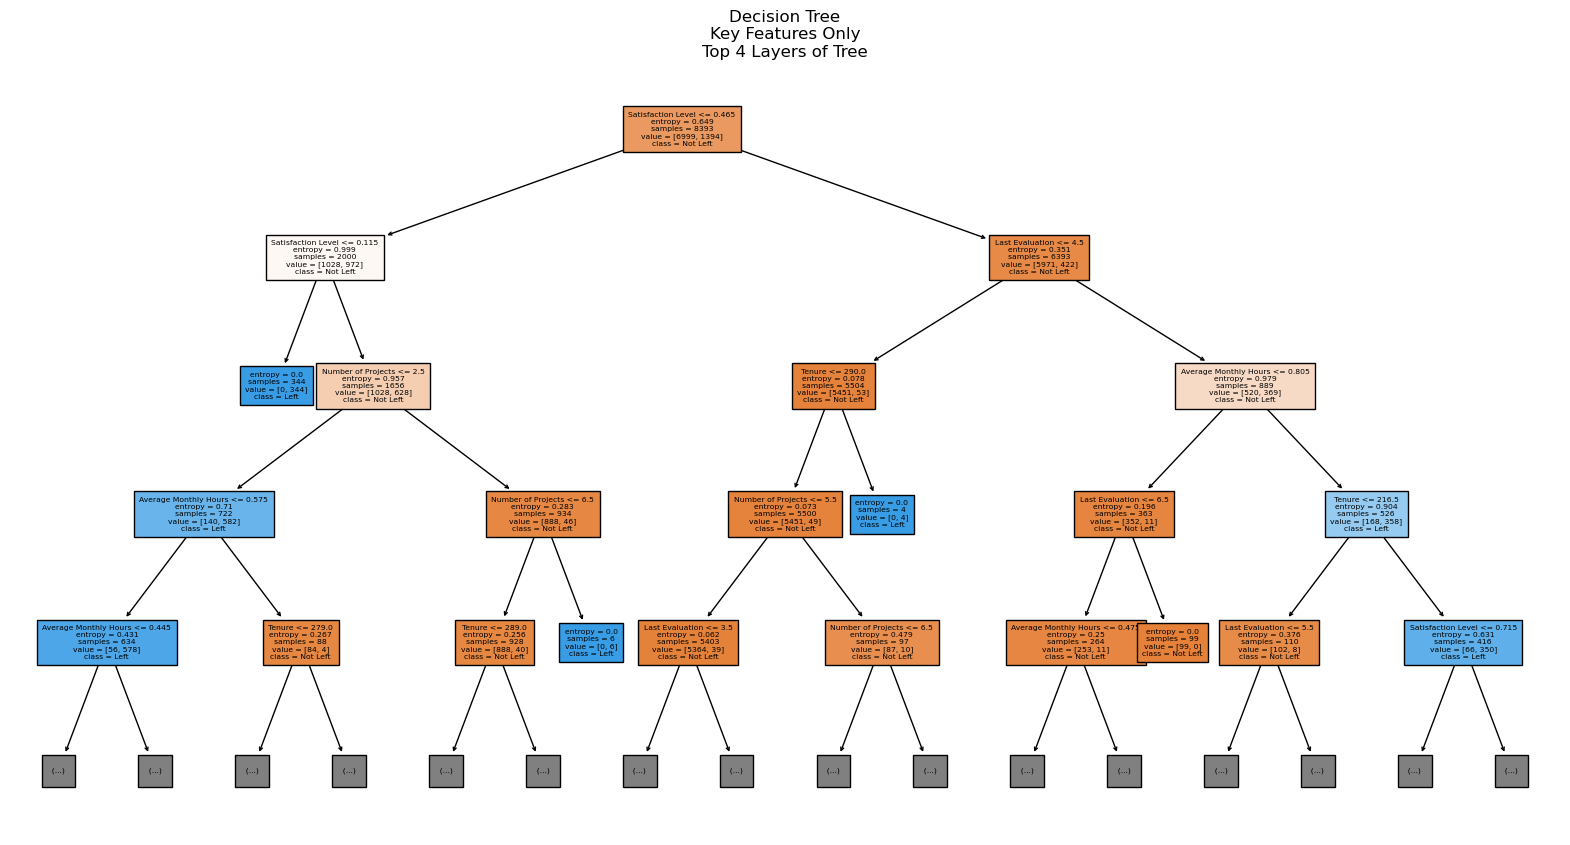

In [83]:
plt.figure(figsize=(20,10))
plot_tree(dt_cv2.best_estimator_, 
          max_depth=4, 
          feature_names = df1.columns.values,
          class_names = ["Not Left", "Left"],
          filled=True,
          fontsize=5.5)
plt.title("Decision Tree\nKey Features Only\nTop 4 Layers of Tree")
plt.show()

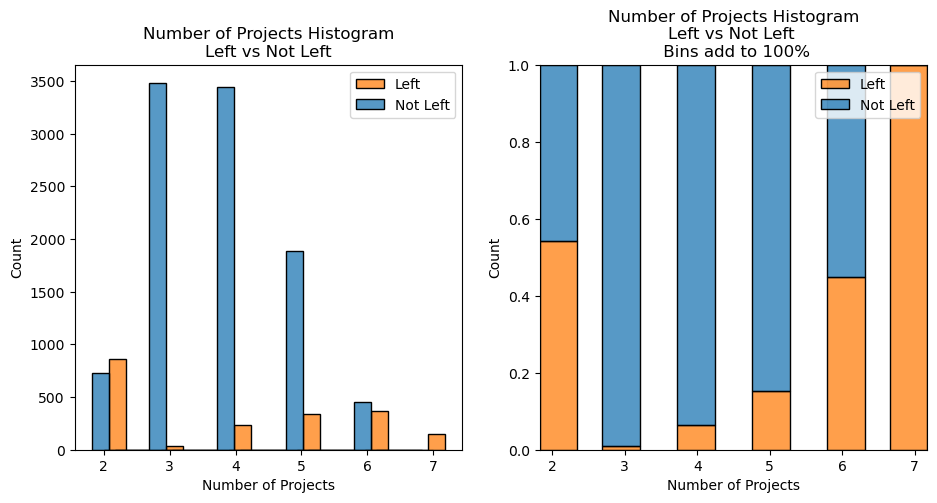

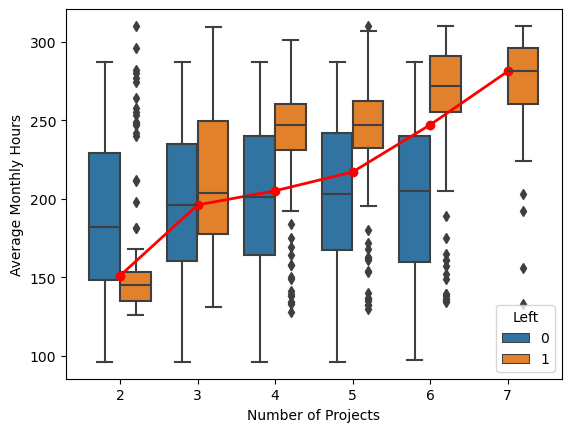

In [84]:
ax = initial_figures_short("Number of Projects", multiple="dodge", shrink=3)

ax = sns.boxplot(data=df1, y="Average Monthly Hours", x="Number of Projects", hue="Left")
ax.plot(group_num_project["Average Monthly Hours"].values,'r-o',linewidth=2)
plt.show()

- As much as possible have all employees working 3 or 4 projects only.
- Look for strategies that stop the number of projects an employee is working on from influencing the number of hours they work.

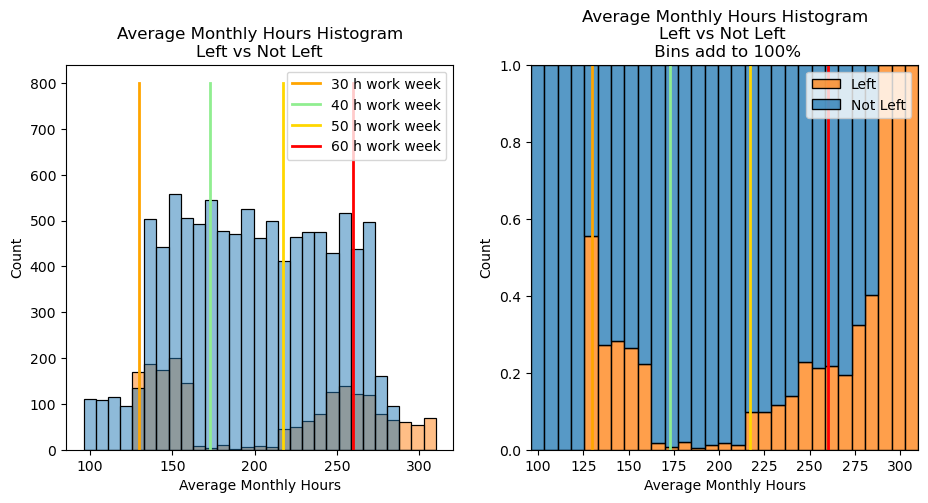

In [85]:
ax = initial_figures_short("Average Monthly Hours", show=False)
x_list = [130.000003, 173.333333, 216.666663, 259.999993]

for i in [0,1]:
    ymax=800
    if i==1:
        ymax=1
    ax[i].plot([130,130], [0,ymax],'orange',linewidth=2, label = "30 h work week") 
    ax[i].plot([173,173], [0,ymax],'lightgreen',linewidth=2, label = "40 h work week") 
    ax[i].plot([217,217], [0,ymax],'gold',linewidth=2, label = "50 h work week") 
    ax[i].plot([260,260], [0,ymax],'r',linewidth=2, label = "60 h work week") 
    if i==0: 
        ax[i].legend()  
plt.show()

- A large part of the workforce is very overworked. Keep work weeks below 50 h/week if at all possible.

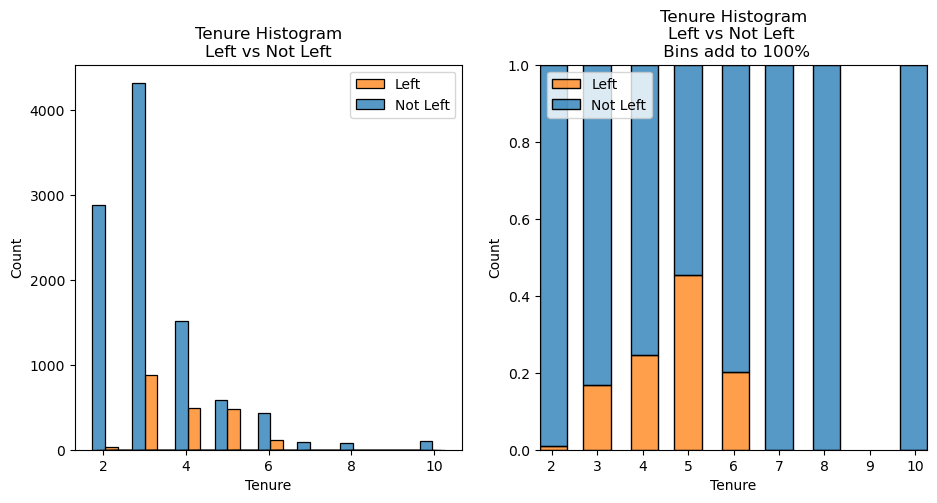

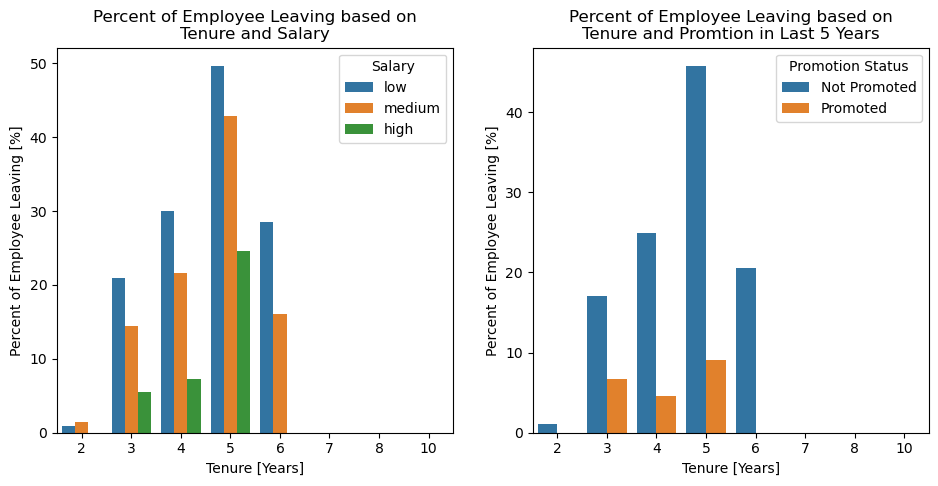

In [86]:
ax = initial_figures_short("Tenure", multiple="dodge", shrink=7)

fig, ax = plt.subplots(1, 2, figsize = (11.25,5))
sns.barplot(chance_of_left_tenure_salary, x="Tenure", y="Left", hue="Salary", hue_order=["low","medium","high"], ax=ax[0])
ax[0].set_ylabel("Percent of Employee Leaving [%]")
ax[0].set_xlabel("Tenure [Years]")
ax[0].set_title("Percent of Employee Leaving based on\nTenure and Salary")
leg = ax[0].get_legend()
leg.set_title("Salary")

sns.barplot(chance_of_left_tenure_promo, x="Tenure", y="Left", hue="Promotion Status", ax=ax[1])
ax[1].set_ylabel("Percent of Employee Leaving [%]")
ax[1].set_xlabel("Tenure [Years]")
ax[1].set_title("Percent of Employee Leaving based on\nTenure and Promtion in Last 5 Years")
plt.show()

- Review the salary and promotion status of employees with between 3-6 years at the company. There is opportunity to decrease employee turnover by giving more raises and promotions. The cost of employee turnover should be measured against the cost of raises.

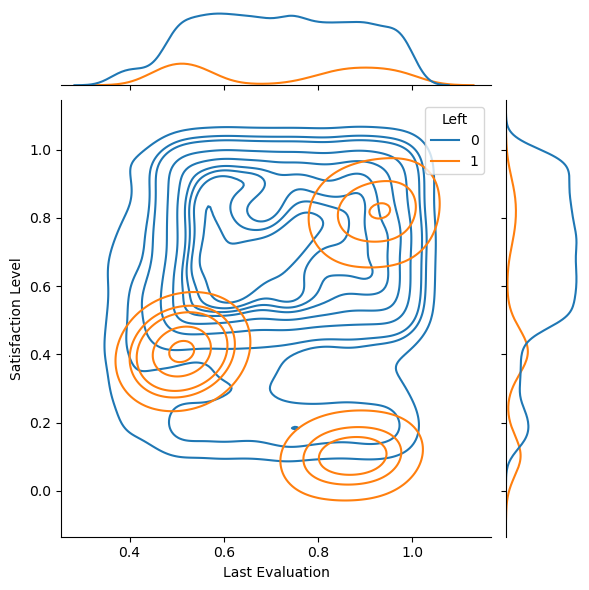

In [87]:
sns.jointplot(data=df1, x="Last Evaluation", y="Satisfaction Level", hue="Left", kind="kde")
plt.show()

- High satisfaction level does not nessisarily mean an employee is likely to stay. There is a group of highly satisfied and highly evaulated employees who tend to leave.

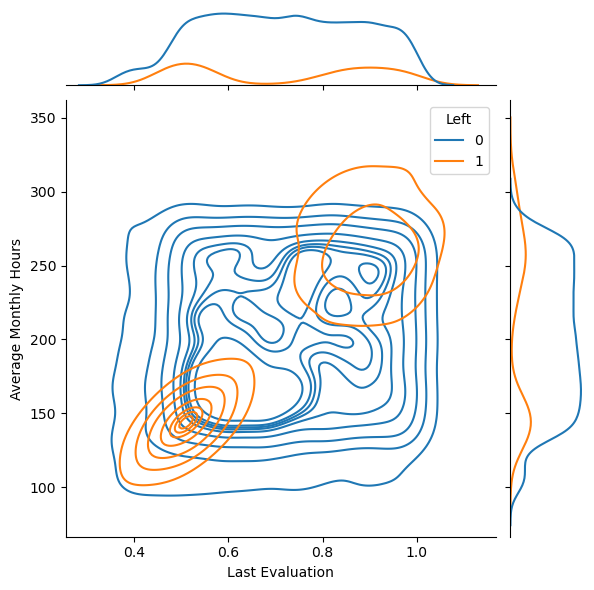

In [88]:
sns.jointplot(data=df1, x="Last Evaluation", y="Average Monthly Hours", hue="Left", kind="kde")
plt.show()

- Employees who are leaving have a correlation between the number of hours worked and their evaluation scores. The company seems to rewarding employees who work long hours. Consider other metrics for performance reviews that are more targeted to the actual value an employee brings. Rewarding long hours may be counterproductive as it is correlated to employee turnover.